### <CENTER><h1><u>Feature Selection & Dimensionality Reduction</u></CENTER></h1>

<br>

<CENTER>(TEAM CONTRIBUTORS: BITTERLEIN KONNOTH BIJU, SHASHANK SHEKHAR, CHAITANYA DEVARSHI)</CENTER>

-------
-------

<h2><u>Content</u></h2>

[Domain Insights](#Domain-Insights)

[Introduction](#Introduction)

- [Problem Statement](#Problem-Statement)
- [Methodology](#Methodology)

[Data Loading & Manipulation](#Data-Loading-&-Manipulation)

[EDA](#Exploratory-Data-Analysis)

- [Missing Values](#Identifying-Missing-Values)
- [Univariate](#Univariate-Analysis)
   - [For numeric features](#Univariate-Analysis-for-numeric-features)
   - [For Binary features](#Univariate-Analysis-for-Binary-features)
- [Bivariate](#Bivariate)
- [Multivariate](#Multivariate)

[Data Cleaning](#Data-Cleaning)

- [Handling Outliers](#Handling-Outliers)

[Feature Selection / Dimensionality Reduction](#Feature-Selection-/-Dimensionality-Reduction)

- [Variance Threshold](#Variance-Threshold)

- [PCA](#Principal-Component-Analysis)

- [Linear Regression Model Evaluation](#Linear-Regression-Model-Evaluation)

- [K-fold](#K_fold)

[Conclusion](#Conclusion)


------
------
------

## Domain Insights

- With the growth of the web, predicting online news popularity has gained interest. This study proposes an Intelligent Decision Support System (IDSS) to predict an article's future popularity by analyzing features known before publication. The system then optimizes specific features to boost expected popularity. Using a dataset of 39,000 articles from Mashable, a Random Forest model achieved a 73% ROC score. Keyword-based features and previous shares were among the most influential. The system increased popularity by optimizing certain article features, showing promising results for Mashable authors. Future work will explore trend analysis and advanced forecasting methods.

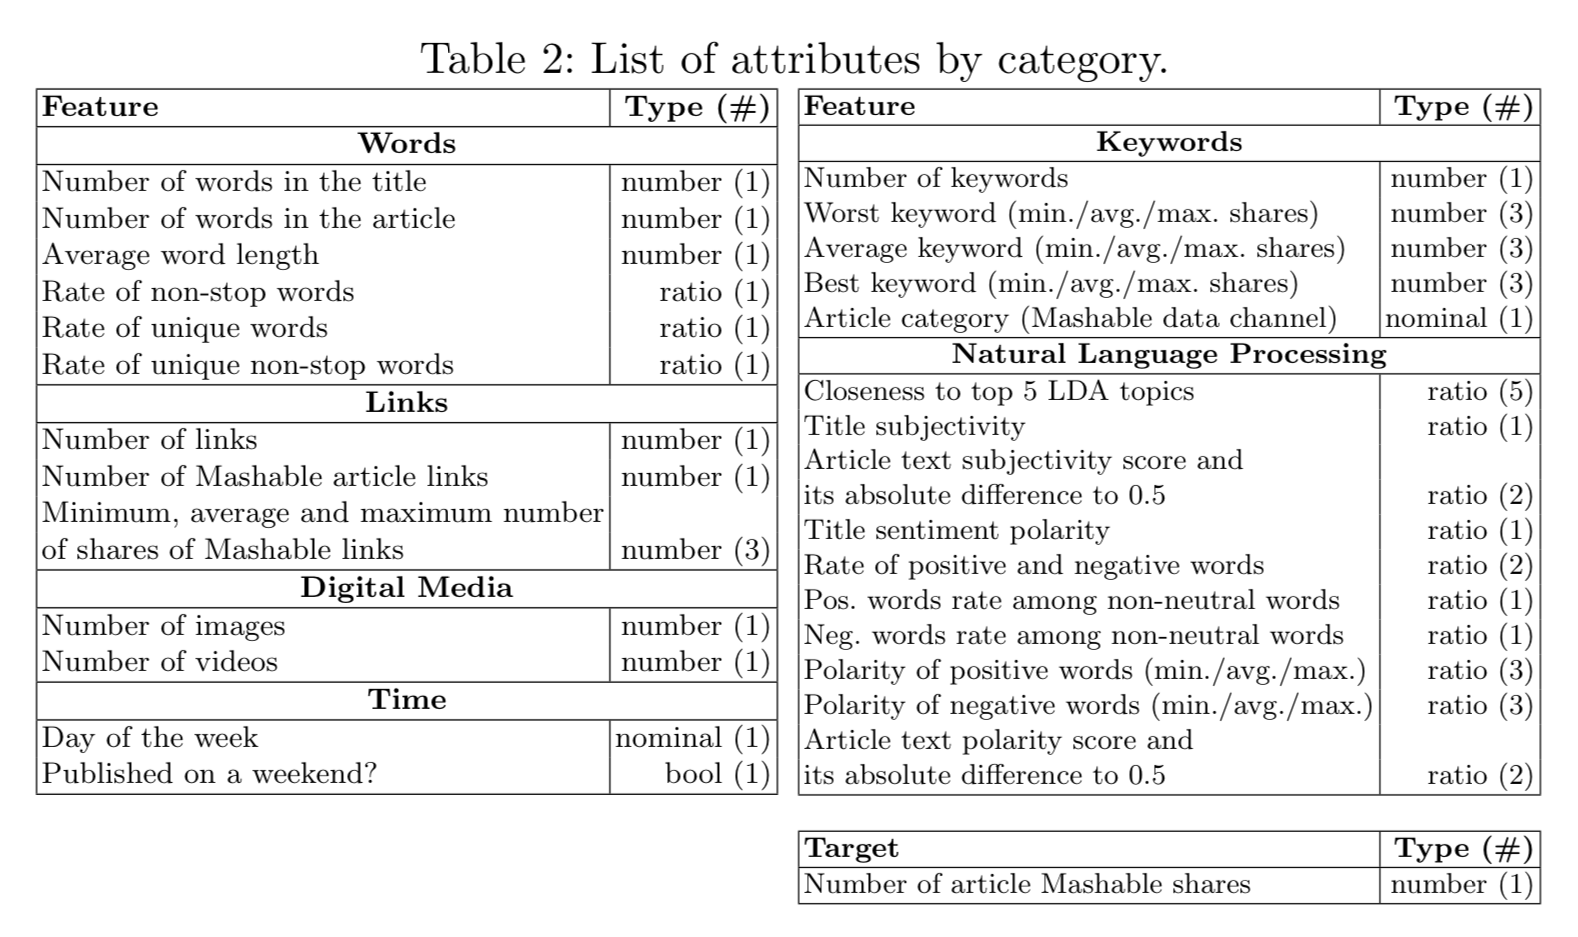

**IDSS** - The IDSS consists of three modules: data extraction, prediction, and optimization. It collects articles, processes their features, and trains models to predict popularity. The optimization module fine-tunes specific article features using the model to suggest improvements, helping users make better decisions.

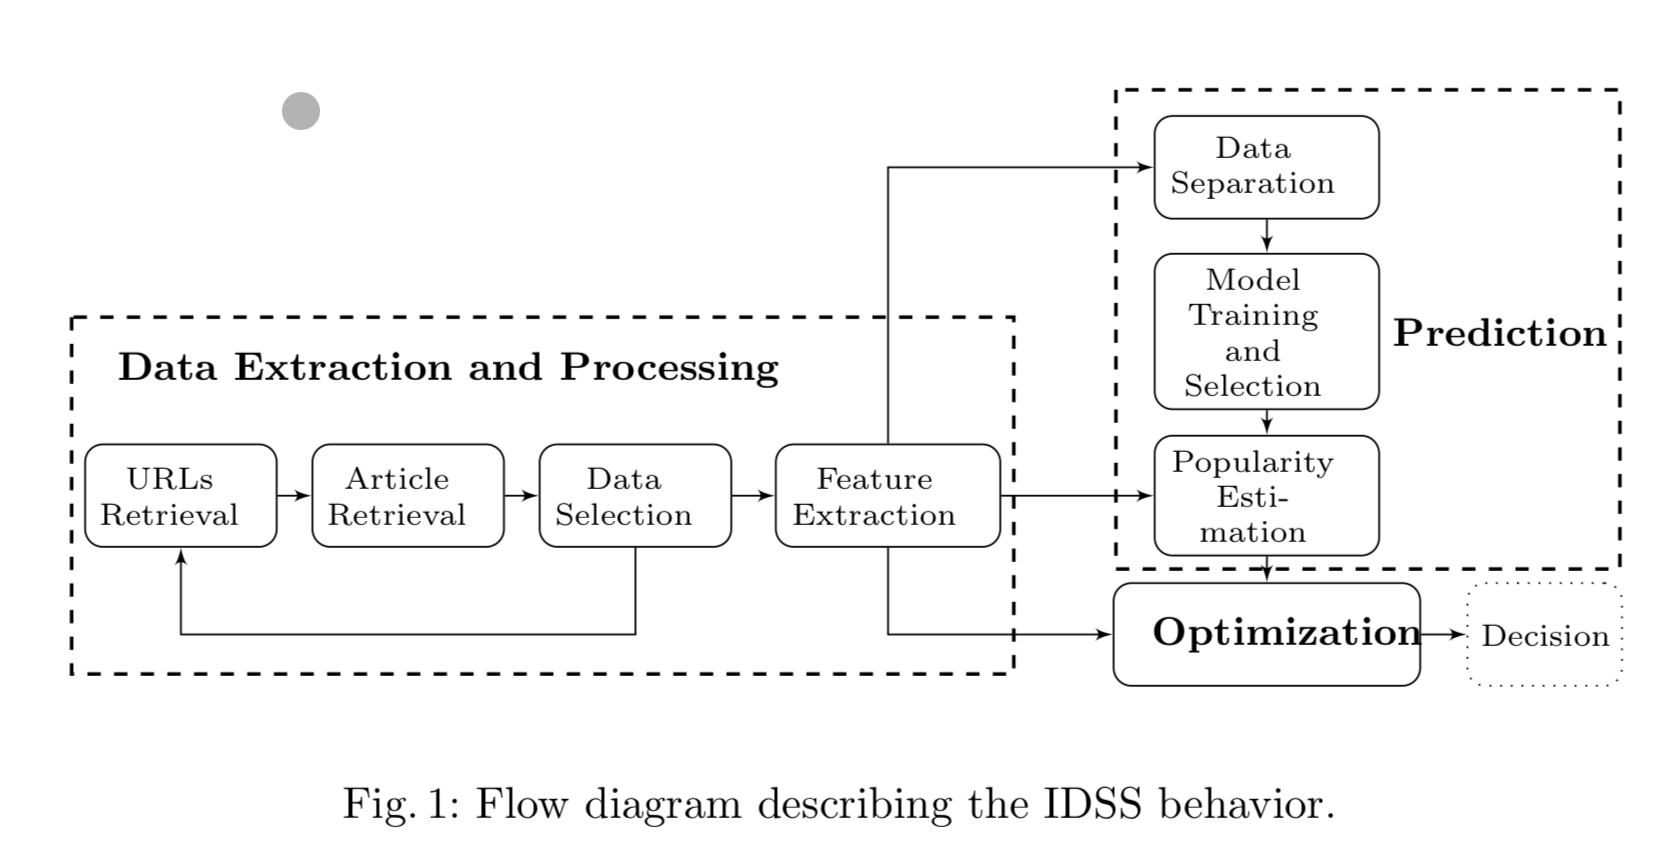

- There were total 5 Models was trained, among all the score of AUC of RF was the best as shown in below image.
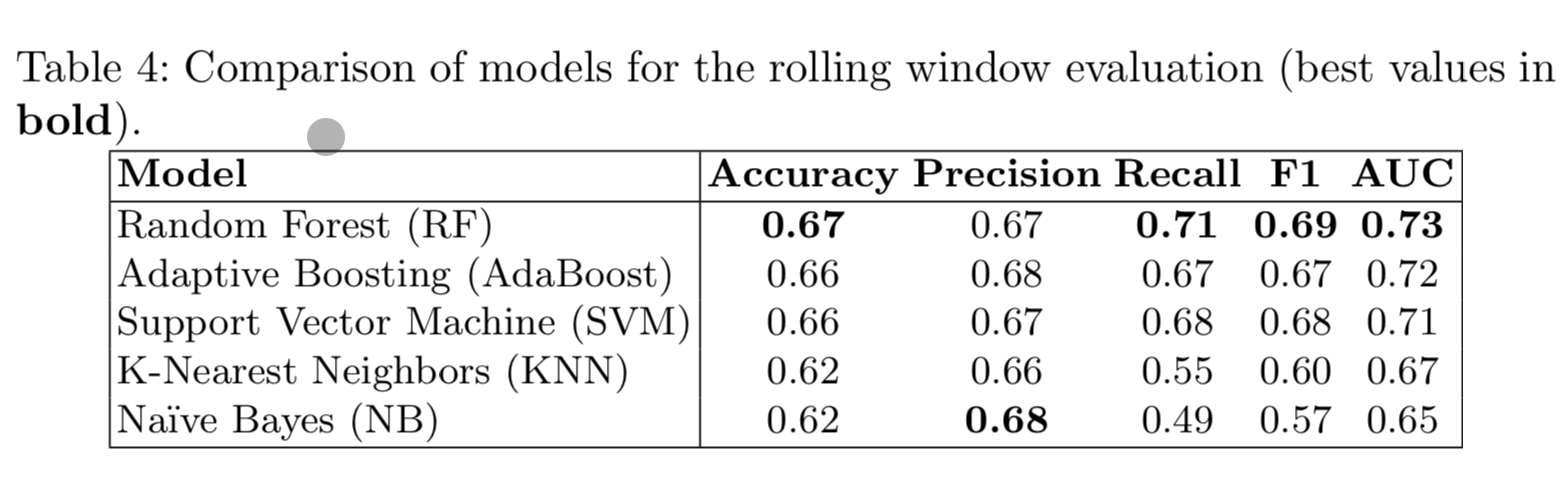

### Source - [Link](https://repositorium.sdum.uminho.pt/bitstream/1822/39169/1/main.pdf)

-------------

## Introduction

Mashable is an independent online news site dedicated to covering digital culture, social media and technology. With more than 20 million unique monthly visitors, Mashable has one of the most engaged online news communities.This dataset summarizes a heterogeneous set of features about articles published by Mashable,[Mashable](www.mashable.com) in a period of two years. The goal is to predict the number of shares in social networks (popularity).


For this assignment our primary task is to apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included within a linear regression model that predicts the number of times an online news article will be shared.

The data set you will be using is sourced from the UC Irvine machine learning archive:https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity . The shares variable will serve as the response variable for your regression model. As such, you are to apply your feature selection / dimensionality reduction expertise to the remaining 60 attributes for purposes of identifying the explanatory variables that you believe will be most useful when
included in a linear regression model that estimates shares.

An overview of the data attributes is provided below:

__Attribute Information:__

|Feature Name | Feature Description      |
|:------------| :-----------------------------------------------------------------------------------:| 
| url                                     | URL of the article (non-predictive)|
|timedelta                                |Days between the article publication and the dataset acquisition (non-predictive)
|n_tokens_title                           |Number of words in the title
|n_tokens_content                         | Number of words in the content
|n_unique_tokens                          |Rate of unique words in the content
|n_non_stop_words                         |Rate of non-stop words in the content
| n_non_stop_unique_tokens                | Rate of unique non-stop words in the content
| num_hrefs                               | Number of links
| num_self_hrefs                          |Number of links to other articles published by Mashable
|num_imgs                                 |Number of images
|num_videos                               | Number of videos
| average_token_length                    | Average length of the words in the content
| num_keywords                            |Number of keywords in the metadata
|data_channel_is_lifestyle                | Is data channel 'Lifestyle'?
| data_channel_is_entertainment           |Is data channel 'Entertainment'?
|data_channel_is_bus                      |Is data channel 'Business'?
|data_channel_is_socmed                   |Is data channel 'Social Media'?
|data_channel_is_tech                     | Is data channel 'Tech'?
|data_channel_is_world                    |Is data channel 'World'?
| kw_min_min                              |Worst keyword (min. shares)
| kw_max_min                              | Worst keyword (max. shares)
| kw_avg_min                              | Worst keyword (avg. shares)
| kw_min_max                              |Best keyword (min. shares)
| kw_max_max                              |Best keyword (max. shares)
| kw_avg_max                              | Best keyword (avg. shares)
| kw_min_avg                              |Avg. keyword (min. shares)
| kw_max_avg                              |Avg. keyword (max. shares)
| kw_avg_avg                              | Avg. keyword (avg. shares)
| self_reference_min_shares               |Min. shares of referenced articles in Mashable
| self_reference_max_shares               |Max. shares of referenced articles in Mashable
|self_reference_avg_sharess               |Avg. shares of referenced articles in Mashable
| weekday_is_monday                       |Was the article published on a Monday?
| weekday_is_tuesday                      |Was the article published on a Tuesday?
|weekday_is_wednesday                     | Was the article published on a Wednesday?
|weekday_is_thursday                      |Was the article published on a Thursday?
|weekday_is_friday                        |Was the article published on a Friday?
|weekday_is_saturday                      |Was the article published on a Saturday?
|weekday_is_sunday                        | Was the article published on a Sunday?
|is_weekend                               |Was the article published on the weekend?
| LDA_00                                  | Closeness to LDA topic 0
| LDA_01                                  | Closeness to LDA topic 1
| LDA_02                                  | Closeness to LDA topic 2
| LDA_03                                  |Closeness to LDA topic 3
| LDA_04                                  |Closeness to LDA topic 4
| global_subjectivity                     |Text subjectivity
|global_sentiment_polarity                |Text sentiment polarity
|global_rate_positive_words               | Rate of positive words in the content
|global_rate_negative_words               |Rate of negative words in the content
| rate_positive_words                     |Rate of positive words among non-neutral tokens
| rate_negative_words                     |Rate of negative words among non-neutral tokens
|avg_positive_polarity                    |Avg. polarity of positive words
| min_positive_polarity                   | Min. polarity of positive words
| max_positive_polarity                   |Max. polarity of positive words
| avg_negative_polarity                   | Avg. polarity of negative  words
| min_negative_polarity                   |Min. polarity of negative  words
| max_negative_polarity                   |Max. polarity of negative  words
|title_subjectivity                       |Title subjectivity
| title_sentiment_polarity                | Title polarity
| abs_title_subjectivity                  |Absolute subjectivity level
| abs_title_sentiment_polarity            |Absolute polarity level
|shares:                                  |Number of shares (target)

## Problem Statement

For this assignment our primary task is to apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included within a linear regression model that predicts the number of times an online news article will be shared.

The shares variable will serve as the response variable for our regression model. As such, we are to apply your feature selection / dimensionality reduction expertise to the remaining 60 attributes for purposes of identifying the explanatory variables that we believe will be most useful when included in a linear regression model that estimates shares.


## Methodology

To address the problem, we will follow these steps:

1. **Load the dataset**: Upload the `M4_Data.csv` file to the DAV 6150 Github Repository.

2. **Read the dataset**: Using a Jupyter Notebook, read the dataset from the Github repository and load it into a Pandas DataFrame.

3. **Perform EDA**: Carry out Exploratory Data Analysis to examine the dataset's structure and understand the variables.

4. **Identify and rectify issues**: Detect data quality and integrity issues such as missing values or outliers during EDA, and take appropriate actions to address them.

5. **Feature scale, selection and dimensionality reduction**:Applying feature selection techniques and perform dimensionality reduction to prepare the data for modeling. 

6. **Creating a Regression modeling and Evaluting**:Building  and evaluating regression models to predict the number of shares using the selected features.






<b> [Back to Content](#Content) </b>

------

## Data Loading & Manipulation

In [1]:
# Importing libraries 
from scipy import stats
import pandas as pd 
import numpy as np
from scipy.stats import boxcox

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

# Importing filterwarnngs  from warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Read the data

In [2]:
# loading the data from the github
article_df=pd.read_csv("https://raw.githubusercontent.com/bitterlein-biju/DAV-6150-/main/M4_Data%20(1).csv")
article_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
# identifing how many rows and columns the dataframe consist of
article_df.shape

(39644, 61)

- The dataset consists of **39644 rows** and **61 columns**, each representing different features about articles published by Mashable 

In [4]:
# getting a concise summary of the DataFrame 
article_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

**Dataset observation:**



- Index ranges from 0-39644.

- Total number of attributes are 61.

- 58 attributes are predictive attributes, 2 are non-predictive, and only one is goal field.



---------

<b> [Back to Content](#Content) </b>

## Exploratory Data Analysis

- Analyzing a data set for purposes of summarizing its characteristics, identifying relationships between its attributes, and discovering patterns, trends, outliers, missing values and invalid values within the data. 

In [5]:
article_df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

- We noticed that some features have extra spaces at the beginning. To resolve this, we'll remove the extra space from the feature names to ensure everything works smoothly.

In [6]:
# Removing the extra space
article_df.columns = article_df.columns.str.strip()

article_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [7]:
# Dropping the 'url' and 'timedelta' columns
article_df = article_df.drop(columns=['url', 'timedelta'])
article_df.head(10)


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,4.855670,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,5.090909,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


- As URL and timedelta will not help in analysing the data (Non-predictive).

In [8]:
# checking for duplicate values
article_df.duplicated().sum()

0

- There are no duplicate values in the dataset 

### Identifying Missing Values

In [9]:
# checking for null values
article_df.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

- There is no missing values. Our dataset for this analysis looks clean.

<b> [Back to Content](#Content) </b>

## Univariate Analysis

In [10]:
#creating a function to check the unique values

# Function to check unique values in a specified column of a dataframe
def unique(df, colms):
    """
    Displays the unique values in a given column in the dataset.
    
    Arguments:
    df : The DataFrame
       
    colms : The column in the DataFrame for which unique values are to be displayed.
    
    """
    
    # Display the unique values in the specified column
    print(f'Unique values in the column "{colms}":')
    display(df[colms].unique())





In [11]:
# Loop through each column in the dataset
for col in article_df.columns:
    unique(article_df, col)


Unique values in the column "n_tokens_title":


array([12.,  9., 13., 10.,  8., 11., 14.,  6.,  7.,  5., 15., 16., 18.,
        4., 17.,  2.,  3., 19., 20., 23.])

Unique values in the column "n_tokens_content":


array([ 219.,  255.,  211., ..., 2090., 2377., 2509.])

Unique values in the column "n_unique_tokens":


array([0.66359447, 0.60474308, 0.57512953, ..., 0.69629629, 0.51635514,
       0.53949329])

Unique values in the column "n_non_stop_words":


array([0.99999999, 0.99999999, 0.99999999, ..., 1.        , 1.        ,
       1.        ])

Unique values in the column "n_non_stop_unique_tokens":


array([0.81538461, 0.7919463 , 0.66386554, ..., 0.60609244, 0.88505747,
       0.69266055])

Unique values in the column "num_hrefs":


array([  4.,   3.,   9.,  19.,   2.,  21.,  20.,  11.,   7.,  18.,  10.,
        26.,  24.,   1.,   5.,  22.,   8.,   0.,  27.,  25.,  14.,  15.,
         6.,  17.,  32.,  23.,  36.,  28.,  13.,  12.,  31.,  34.,  45.,
        16.,  38.,  29.,  53.,  56.,  30.,  44.,  41.,  70.,  33.,  47.,
        40.,  48.,  67.,  51.,  39.,  49.,  52.,  54.,  42.,  59.,  57.,
        43.,  63.,  50.,  35.,  46.,  37.,  71.,  69.,  64.,  62.,  60.,
        82., 120., 171.,  91.,  65., 102.,  76.,  78.,  58.,  75.,  61.,
       100.,  55.,  89.,  74.,  68.,  83.,  93.,  81., 105., 107.,  72.,
       118.,  77.,  73., 117.,  79., 140., 127., 122.,  86.,  85.,  96.,
       152.,  98., 101., 116., 110.,  66.,  80., 108.,  97., 187., 143.,
       104.,  94., 119., 159., 148., 153., 158., 162., 150.,  84.,  87.,
       106., 103., 123.,  92., 142.,  90., 145., 124.,  88., 161., 186.,
       304.])

Unique values in the column "num_self_hrefs":


array([  2.,   1.,   0.,  19.,  20.,   3.,  18.,  24.,  22.,   4.,   7.,
         6.,  21.,   8.,   5.,  10.,  11.,   9.,  30.,  23.,  38.,  27.,
        12.,  39.,  15.,  47.,  31.,  28.,  16.,  41.,  34.,  42.,  13.,
        17.,  36.,  51.,  40.,  55.,  63.,  32.,  53.,  25.,  54.,  14.,
        50.,  26.,  33.,  74.,  56.,  49.,  37.,  29.,  43.,  60.,  44.,
        35.,  62., 116.,  65.])

Unique values in the column "num_imgs":


array([  1.,  20.,   0.,  11.,   9.,  12.,  42.,  28.,  19.,  14.,  23.,
        10.,   4.,  16.,  13.,   8.,  26.,  15.,   6.,   5.,  34.,  18.,
         7.,  33.,  25.,  21.,  27.,  17.,  22.,   2.,  30.,  99.,  31.,
        24.,  37.,  39.,  40.,  61.,  32.,  60.,  35.,  44.,  52.,  47.,
        98.,  56.,  46.,  92.,  36.,  62.,  41.,   3.,  75.,  91.,  45.,
        48.,  50.,  55.,  76.,  38.,  49.,  54.,  90.,  29.,  71.,  70.,
        51.,  64., 100., 101.,  43.,  80.,  63.,  53., 128.,  66.,  67.,
        69.,  68.,  58.,  73.,  93.,  57.,  84.,  83., 108., 111.,  65.,
        79.,  77.,  59.])

Unique values in the column "num_videos":


array([ 0.,  1., 21.,  6., 11.,  3., 16., 12.,  7., 10.,  2., 26.,  9.,
       14., 20., 17.,  4., 13., 30.,  8., 15., 73.,  5., 74., 18., 75.,
       22., 34., 19., 23., 35., 33., 25., 38., 24., 32., 31., 27., 28.,
       50., 51., 91., 42., 53., 65., 66., 29., 59., 58., 48., 36., 46.,
       49.])

Unique values in the column "average_token_length":


array([4.6803653 , 4.91372549, 4.39336493, ..., 4.52312139, 4.4054878 ,
       4.97507331])

Unique values in the column "num_keywords":


array([ 5.,  4.,  6.,  7.,  9., 10.,  8.,  3.,  1.,  2.])

Unique values in the column "data_channel_is_lifestyle":


array([0., 1.])

Unique values in the column "data_channel_is_entertainment":


array([1., 0.])

Unique values in the column "data_channel_is_bus":


array([0., 1.])

Unique values in the column "data_channel_is_socmed":


array([0., 1.])

Unique values in the column "data_channel_is_tech":


array([0., 1.])

Unique values in the column "data_channel_is_world":


array([0., 1.])

Unique values in the column "kw_min_min":


array([  0., 217.,   4., 294., 318., 377., 129., 116.,  98.,  86.,  47.,
       138.,  63.,  45.,  82.,  57., 184.,  41.,  -1., 162.,  65.,  42.,
       201.,  88.,  80.,  97.])

Unique values in the column "kw_max_min":


array([    0.,   504.,   462., ...,   257., 53900.,   470.])

Unique values in the column "kw_avg_min":


array([  0.        , 421.75      , 408.33333333, ..., 129.8       ,
        85.88888889, 102.86333333])

Unique values in the column "kw_min_max":


array([    0.,   480.,  1300., ..., 41100., 62900.,   883.])

Unique values in the column "kw_max_max":


array([     0.,  17100.,  28000.,  37400.,  39400.,  51900.,  69100.,
        80400., 227300., 617900., 690400.,  35800., 306100.,  15000.,
        57600.,  67500.,  93800.,  73100., 843300.,  11100., 118700.,
        18200.,  41600., 104100., 210300.,  27700., 310800., 441000.,
       139600., 111300.,  53100.,  86200., 208300., 663600., 233400.])

Unique values in the column "kw_avg_max":


array([     0.        ,   3616.66666667,   3516.66666667, ...,
       374962.5       , 192985.714286  , 295850.        ])

Unique values in the column "kw_min_avg":


array([   0.        ,  480.        ,  726.6       , ..., 1664.26785714,
       1753.88235294, 3035.08055518])

Unique values in the column "kw_max_avg":


array([   0.        , 2019.34615385, 2318.47619048, ..., 5470.16865079,
       3384.31687071, 3613.51295337])

Unique values in the column "kw_avg_avg":


array([   0.        ,  804.38031136,  728.23031136, ..., 4206.43919512,
       1777.89588325, 3296.90948104])

Unique values in the column "self_reference_min_shares":


array([  496.,     0.,   918., ..., 64300., 75500.,   306.])

Unique values in the column "self_reference_max_shares":


array([496.,   0., 918., ..., 669., 719., 452.])

Unique values in the column "self_reference_avg_sharess":


array([ 496.        ,    0.        ,  918.        , ..., 2745.08333333,
       5181.41666667,  452.        ])

Unique values in the column "weekday_is_monday":


array([1., 0.])

Unique values in the column "weekday_is_tuesday":


array([0., 1.])

Unique values in the column "weekday_is_wednesday":


array([0., 1.])

Unique values in the column "weekday_is_thursday":


array([0., 1.])

Unique values in the column "weekday_is_friday":


array([0., 1.])

Unique values in the column "weekday_is_saturday":


array([0., 1.])

Unique values in the column "weekday_is_sunday":


array([0., 1.])

Unique values in the column "is_weekend":


array([0., 1.])

Unique values in the column "LDA_00":


array([0.5003312 , 0.79975569, 0.21779229, ..., 0.15900446, 0.04000361,
       0.05000126])

Unique values in the column "LDA_01":


array([0.37827893, 0.05004668, 0.03333446, ..., 0.02502466, 0.04000349,
       0.79933895])

Unique values in the column "LDA_02":


array([0.04000468, 0.05009625, 0.03335142, ..., 0.02520734, 0.83998726,
       0.05000041])

Unique values in the column "LDA_03":


array([0.04126265, 0.05010067, 0.03333354, ..., 0.64379353, 0.0400021 ,
       0.05065874])

Unique values in the column "LDA_04":


array([0.04012254, 0.05000071, 0.68218829, ..., 0.14697   , 0.04000355,
       0.05000064])

Unique values in the column "global_subjectivity":


array([0.52161715, 0.34124579, 0.70222222, ..., 0.51029582, 0.35857761,
       0.51789322])

Unique values in the column "global_sentiment_polarity":


array([ 0.09256198,  0.14894781,  0.32333333, ...,  0.02460859,
       -0.00806586,  0.10489177])

Unique values in the column "global_rate_positive_words":


array([0.0456621 , 0.04313725, 0.05687204, ..., 0.02670387, 0.04665439,
       0.03393665])

Unique values in the column "global_rate_negative_words":


array([0.01369863, 0.01568627, 0.00947867, ..., 0.00800915, 0.02112395,
       0.0208717 ])

Unique values in the column "rate_positive_words":


array([0.76923077, 0.73333333, 0.85714286, ..., 0.52873563, 0.72566372,
       0.55833333])

Unique values in the column "rate_negative_words":


array([0.23076923, 0.26666667, 0.14285714, ..., 0.47126437, 0.27433628,
       0.44166667])

Unique values in the column "avg_positive_polarity":


array([0.37863636, 0.2869146 , 0.49583333, ..., 0.33379121, 0.23685065,
       0.24733766])

Unique values in the column "min_positive_polarity":


array([0.1       , 0.03333333, 0.13636364, 0.4       , 0.2       ,
       0.16      , 0.05      , 0.25      , 0.0625    , 0.16666667,
       0.21428571, 0.28571429, 0.7       , 0.5       , 0.375     ,
       0.        , 0.15      , 0.43333333, 0.08333333, 0.3       ,
       0.35      , 0.33333333, 0.41666667, 0.6       , 0.35714286,
       0.8       , 0.125     , 0.22727273, 0.36666667, 1.        ,
       0.45      , 0.9       , 0.75      ])

Unique values in the column "max_positive_polarity":


array([0.7       , 1.        , 0.8       , 0.6       , 0.5       ,
       0.35      , 0.43333333, 0.85      , 0.33333333, 0.75      ,
       0.4       , 0.2       , 0.28571429, 0.3       , 0.375     ,
       0.1       , 0.9       , 0.13636364, 0.55      , 0.83333333,
       0.15      , 0.        , 0.25      , 0.73333333, 0.03333333,
       0.16      , 0.41666667, 0.16666667, 0.66666667, 0.21428571,
       0.05      , 0.35714286, 0.0625    , 0.45      , 0.22727273,
       0.65      , 0.95      , 0.36666667])

Unique values in the column "avg_negative_polarity":


array([-0.35      , -0.11875   , -0.46666667, ..., -0.23161155,
       -0.42953431, -0.20524554])

Unique values in the column "min_negative_polarity":


array([-0.6       , -0.125     , -0.8       , -0.5       , -0.4       ,
       -1.        , -0.7       , -0.1875    , -0.2       , -0.16666667,
        0.        , -0.3125    , -0.3       , -0.1       , -0.25      ,
       -0.15      , -0.15555556, -0.71428571, -0.38888889, -0.13333333,
       -0.9       , -0.75      , -0.66666667, -0.33333333, -0.29166667,
       -0.375     , -0.625     , -0.07142857, -0.05      , -0.65      ,
       -0.43333333, -0.21428571, -0.875     , -0.14285714, -0.56666667,
       -0.23076923, -0.31666667, -0.17857143, -0.55      , -0.025     ,
       -0.41666667, -0.175     , -0.06666667, -0.075     , -0.21      ,
       -0.07692308, -0.03333333, -0.0125    , -0.46666667, -0.73333333,
       -0.35      , -0.21666667, -0.08333333, -0.225     ])

Unique values in the column "max_negative_polarity":


array([-0.2       , -0.1       , -0.13333333, -0.16666667, -0.05      ,
       -0.125     ,  0.        , -0.00833333, -0.4       , -0.3       ,
       -0.07142857, -0.15      , -0.025     , -0.1875    , -0.075     ,
       -0.03333333, -0.15555556, -0.25      , -0.17857143, -0.8       ,
       -0.08333333, -0.0125    , -0.29166667, -0.5       , -0.07692308,
       -0.3125    , -0.33333333, -0.06666667, -0.175     , -0.7       ,
       -1.        , -0.75      , -0.6       , -0.31666667, -0.38888889,
       -0.66666667, -0.14285714, -0.21428571, -0.21666667, -0.71428571,
       -0.23076923, -0.43333333, -0.625     , -0.375     , -0.9       ,
       -0.225     , -0.21      , -0.875     , -0.55      ])

Unique values in the column "title_subjectivity":


array([0.5       , 0.        , 0.45454545, 0.64285714, 1.        ,
       0.125     , 0.75      , 0.56666667, 0.85714286, 0.45      ,
       0.7       , 0.9       , 0.55      , 0.66666667, 0.4       ,
       0.58333333, 0.85      , 0.42727273, 0.33333333, 0.65      ,
       0.25      , 0.06666667, 0.375     , 0.48333333, 0.3       ,
       0.1       , 0.8       , 0.2       , 0.54375   , 0.95      ,
       0.3125    , 0.28888889, 0.42857143, 0.6       , 0.83333333,
       0.57142857, 0.50707071, 0.48809524, 0.38333333, 0.28333333,
       0.16666667, 0.35      , 0.21666667, 0.475     , 0.43333333,
       0.825     , 0.82142857, 0.91666667, 0.05      , 0.5375    ,
       0.625     , 0.225     , 0.41666667, 0.21428571, 0.70707071,
       0.52222222, 0.55555556, 0.44166667, 0.61111111, 0.26060606,
       0.14285714, 0.18888889, 0.36666667, 0.53333333, 0.37727273,
       0.23333333, 0.18333333, 0.22727273, 0.3523088 , 0.14444444,
       0.31818182, 0.36785714, 0.42380952, 0.35555556, 0.03333

Unique values in the column "title_sentiment_polarity":


array([-1.87500000e-01,  0.00000000e+00,  1.36363636e-01,  2.14285714e-01,
        5.00000000e-01, -1.00000000e+00,  5.50000000e-01, -2.50000000e-01,
       -1.00000000e-01, -7.14285714e-01,  4.00000000e-01, -4.00000000e-01,
        1.00000000e+00,  3.50000000e-01, -6.00000000e-01, -5.00000000e-01,
        1.00000000e-01, -5.00000000e-02,  2.50000000e-01,  1.68181818e-01,
        2.00000000e-01,  3.33333333e-02, -1.25000000e-01, -6.25000000e-02,
        4.16666667e-01,  3.33333333e-01, -2.56250000e-01,  6.50000000e-01,
        2.37500000e-01,  1.77777778e-01,  1.75000000e-01,  6.00000000e-01,
        6.33333333e-01,  6.66666667e-01, -3.00000000e-01,  3.00000000e-01,
       -8.00000000e-01,  3.57142857e-01,  8.98989899e-02,  2.32142857e-01,
       -3.50000000e-01,  6.25000000e-02,  2.66666667e-01, -1.50000000e-01,
        4.33333333e-01, -3.33333333e-02, -7.50000000e-01,  7.00000000e-01,
       -2.00000000e-01, -8.33333333e-02,  3.75000000e-01,  8.00000000e-01,
       -1.66666667e-01,  

Unique values in the column "abs_title_subjectivity":


array([0.        , 0.5       , 0.04545455, 0.14285714, 0.375     ,
       0.25      , 0.06666667, 0.35714286, 0.05      , 0.2       ,
       0.4       , 0.16666667, 0.1       , 0.08333333, 0.35      ,
       0.07272727, 0.15      , 0.43333333, 0.125     , 0.01666667,
       0.3       , 0.04375   , 0.45      , 0.1875    , 0.21111111,
       0.07142857, 0.33333333, 0.00707071, 0.01190476, 0.11666667,
       0.21666667, 0.28333333, 0.025     , 0.325     , 0.32142857,
       0.41666667, 0.0375    , 0.275     , 0.28571429, 0.20707071,
       0.02222222, 0.05555556, 0.05833333, 0.11111111, 0.23939394,
       0.31111111, 0.13333333, 0.03333333, 0.12272727, 0.26666667,
       0.31666667, 0.27272727, 0.1476912 , 0.35555556, 0.18181818,
       0.13214286, 0.07619048, 0.14444444, 0.46666667, 0.18928571,
       0.27      , 0.04      , 0.18888889, 0.06428571, 0.02      ,
       0.04166667, 0.22272727, 0.05227273, 0.23333333, 0.47777778,
       0.2875    , 0.18333333, 0.00833333, 0.21428571, 0.27777

Unique values in the column "abs_title_sentiment_polarity":


array([1.87500000e-01, 0.00000000e+00, 1.36363636e-01, 2.14285714e-01,
       5.00000000e-01, 1.00000000e+00, 5.50000000e-01, 2.50000000e-01,
       1.00000000e-01, 7.14285714e-01, 4.00000000e-01, 3.50000000e-01,
       6.00000000e-01, 5.00000000e-02, 1.68181818e-01, 2.00000000e-01,
       3.33333333e-02, 1.25000000e-01, 6.25000000e-02, 4.16666667e-01,
       3.33333333e-01, 2.56250000e-01, 6.50000000e-01, 2.37500000e-01,
       1.77777778e-01, 1.75000000e-01, 6.33333333e-01, 6.66666667e-01,
       3.00000000e-01, 8.00000000e-01, 3.57142857e-01, 8.98989899e-02,
       2.32142857e-01, 2.66666667e-01, 1.50000000e-01, 4.33333333e-01,
       7.50000000e-01, 7.00000000e-01, 8.33333333e-02, 3.75000000e-01,
       1.66666667e-01, 4.25000000e-01, 3.16666667e-01, 5.16666667e-01,
       7.50000000e-02, 2.71590909e-01, 1.66666667e-02, 1.93181818e-01,
       1.56565657e-01, 7.14285714e-02, 2.77555756e-17, 2.12121212e-02,
       9.00000000e-01, 6.81818182e-02, 1.11111111e-02, 4.95833333e-01,
      

Unique values in the column "shares":


array([  593,   711,  1500, ..., 34500, 25600, 45000])

- By analyzing the unique values of each feature, we can effectively categorize the dataset into numerical and categorical columns. We observed that some features contain boolean values, so we will separate these as a subset of the dataset. Afterward, we will apply the Univariate_analysis function to the remaining features which is numeric columns

In [12]:
# Looping through each columm.

binary_columns = []             # empty list to fill further with the binary features name

for col in article_df.columns:
    # Check if the column contains only values 0 and 1
    unique_values = article_df[col].unique()
    
    # If the unique values are [0, 1] or [1, 0] display it
    if set(unique_values) == {0, 1}:
        binary_columns.append(col)
        
print(binary_columns)

['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']


 - we got the columns with boolean values 

In [13]:
# creating a dataframe for binary_columns
article_binary_df = article_df[binary_columns]

# creating a dataframe for numeric coulmns
article_numeric_df = article_df.drop(binary_columns,axis=1)

# Displaying the first 5 rows of article_numeric_df
print('article_numeric_df')
display(article_numeric_df.head(5))

# Displaying the first 5 rows of article_binary_df
print('article_binary_df')
display(article_binary_df.head(5))

article_numeric_df


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


article_binary_df


,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Effective rows and columns of article_binary, & article_numeric.

print('Dimension of article_binary:', article_binary_df.shape)

print('Dimension of article_numeric:', article_numeric_df.shape)

Dimension of article_binary: (39644, 14)
Dimension of article_numeric: (39644, 45)


- Now we have distributed our dataset into 2, one which has binary data and other which has numeric data.

In [15]:
# Looping through each columm
for col in article_df.columns:
    # Check if the column contains only values 0 and 1
    unique_values = article_df[col].unique()
    
    # If the unique values are [0, 1] or [1, 0] display it
    if set(unique_values) != {0, 1}:
        print(col)



n_tokens_title
n_tokens_content
n_unique_tokens
n_non_stop_words
n_non_stop_unique_tokens
num_hrefs
num_self_hrefs
num_imgs
num_videos
average_token_length
num_keywords
kw_min_min
kw_max_min
kw_avg_min
kw_min_max
kw_max_max
kw_avg_max
kw_min_avg
kw_max_avg
kw_avg_avg
self_reference_min_shares
self_reference_max_shares
self_reference_avg_sharess
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04
global_subjectivity
global_sentiment_polarity
global_rate_positive_words
global_rate_negative_words
rate_positive_words
rate_negative_words
avg_positive_polarity
min_positive_polarity
max_positive_polarity
avg_negative_polarity
min_negative_polarity
max_negative_polarity
title_subjectivity
title_sentiment_polarity
abs_title_subjectivity
abs_title_sentiment_polarity
shares


- Now we can use these feature names to create plots and display the corresponding summary statistics. Since there are many variables, we will split the features into separate sections for easier interpretation.

## Univariate Analysis for numeric features

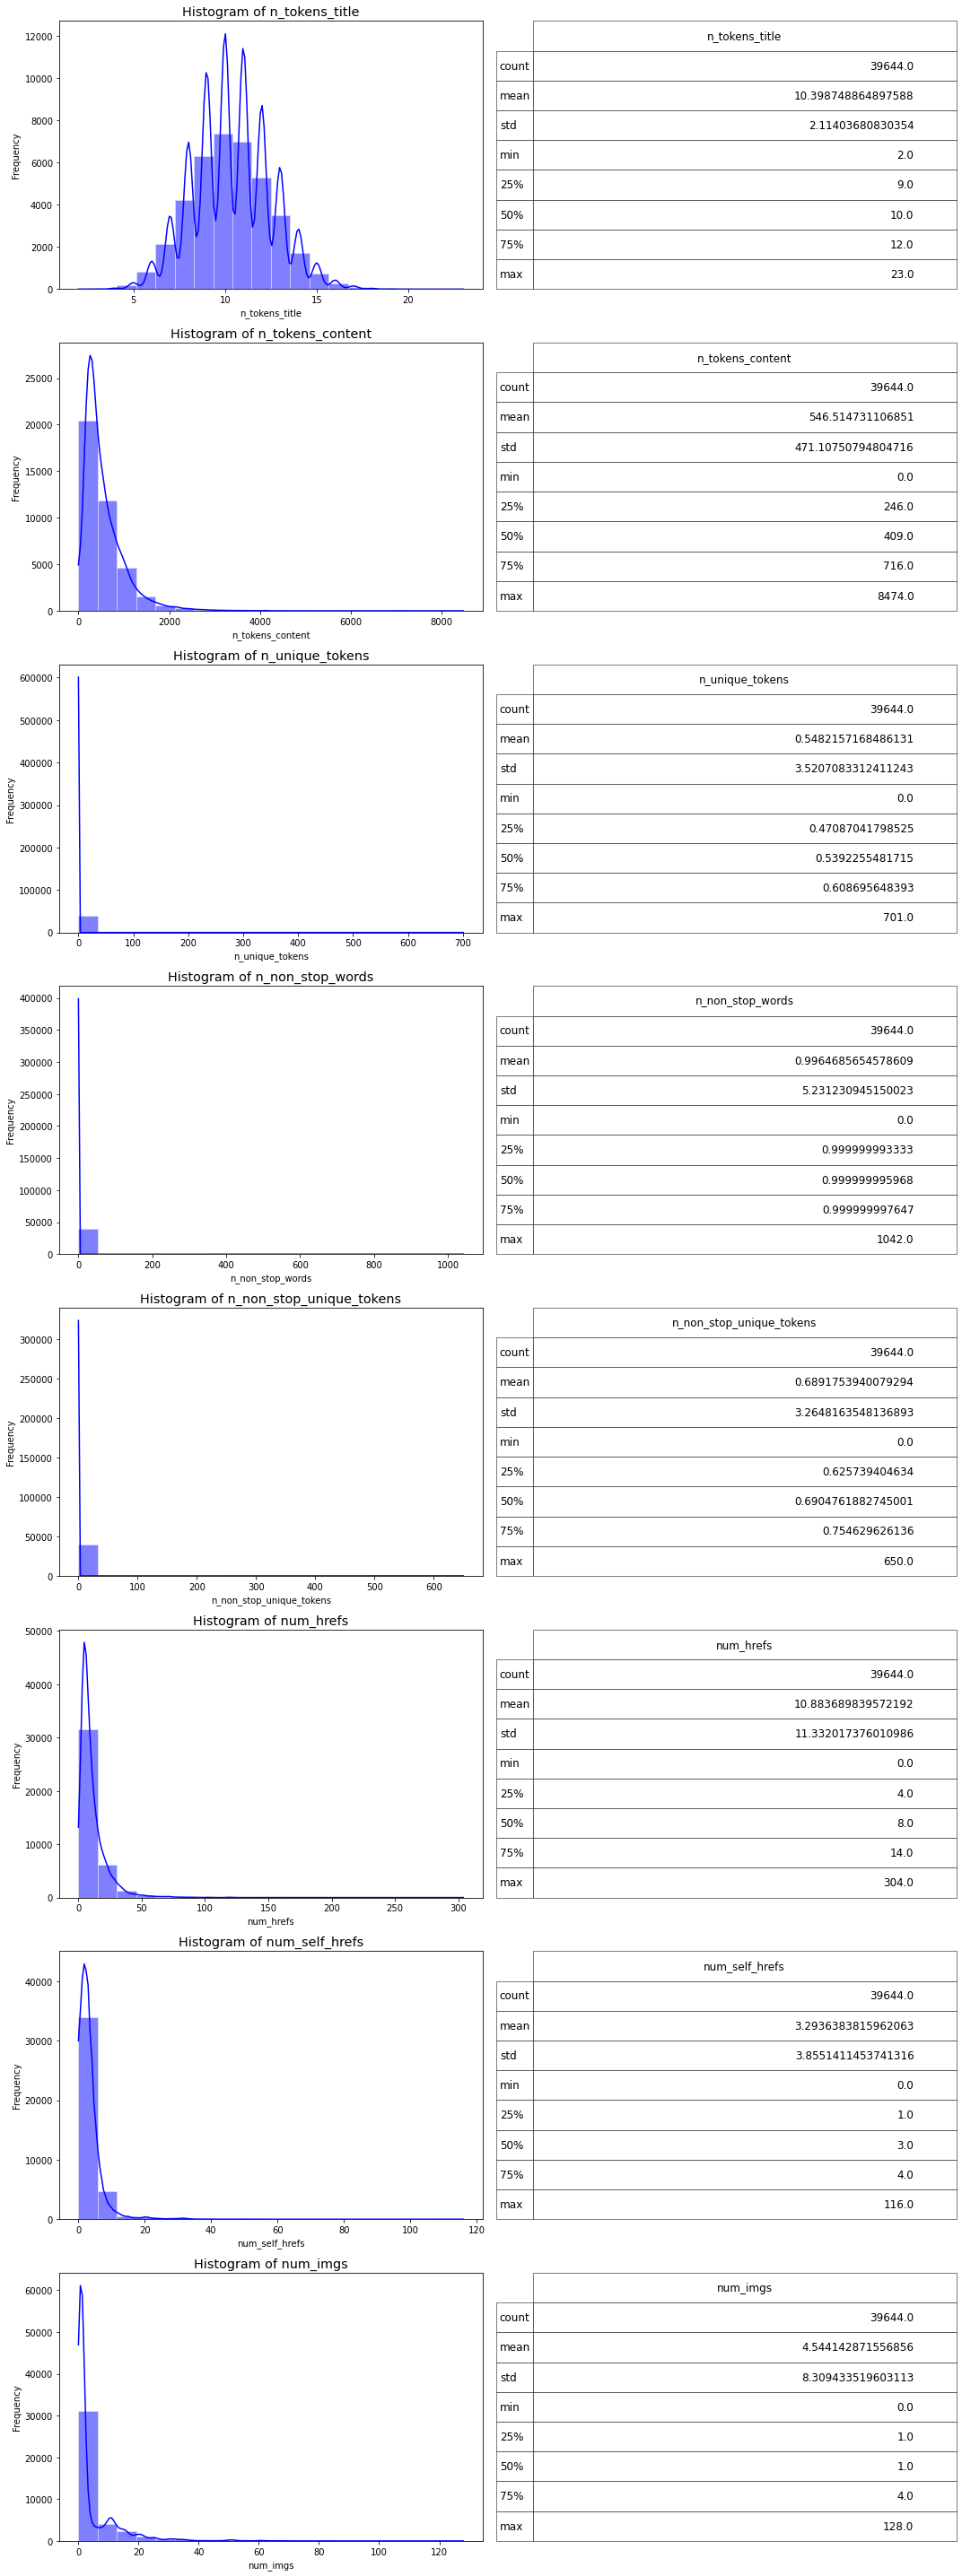

In [16]:
# seperating the features 
features = [
    'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
    'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
    'num_self_hrefs', 'num_imgs']

# setting figure size
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 40))

# Initializing counter
idx = 0

plt.style.use('ggplot')
# Looping  through the each  feature and create a histogram + summary statistics table
for feature in features:
    sns.histplot(data=article_df, x=feature, bins=20, color='blue',kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Histogram of {feature}')
    axes[idx, 0].set_xlabel(feature)
    axes[idx, 0].set_ylabel('Frequency')

    # Getting summary statistics and converting to dataframe
    df_summary = article_df[feature].describe().to_frame()

    
    axes[idx, 1].axis('off')  #  To Hide axis for the table
    font_size = 12
    bbox = [0, 0, 1, 1]  # Table positioning inside the subplot
    mpl_table = axes[idx, 1].table(cellText=df_summary.values, rowLabels=df_summary.index, bbox=bbox, colLabels=df_summary.columns)
    
    # Adjusting the font size for the table
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    # Increment the counter for the next subplot
    idx += 1
    
# Display the plots
plt.tight_layout()
plt.show()


- From the histogram above, it is evident that, except for the variable n_tokens_title, all other features exhibit left skewness,
which implies mean is less than median

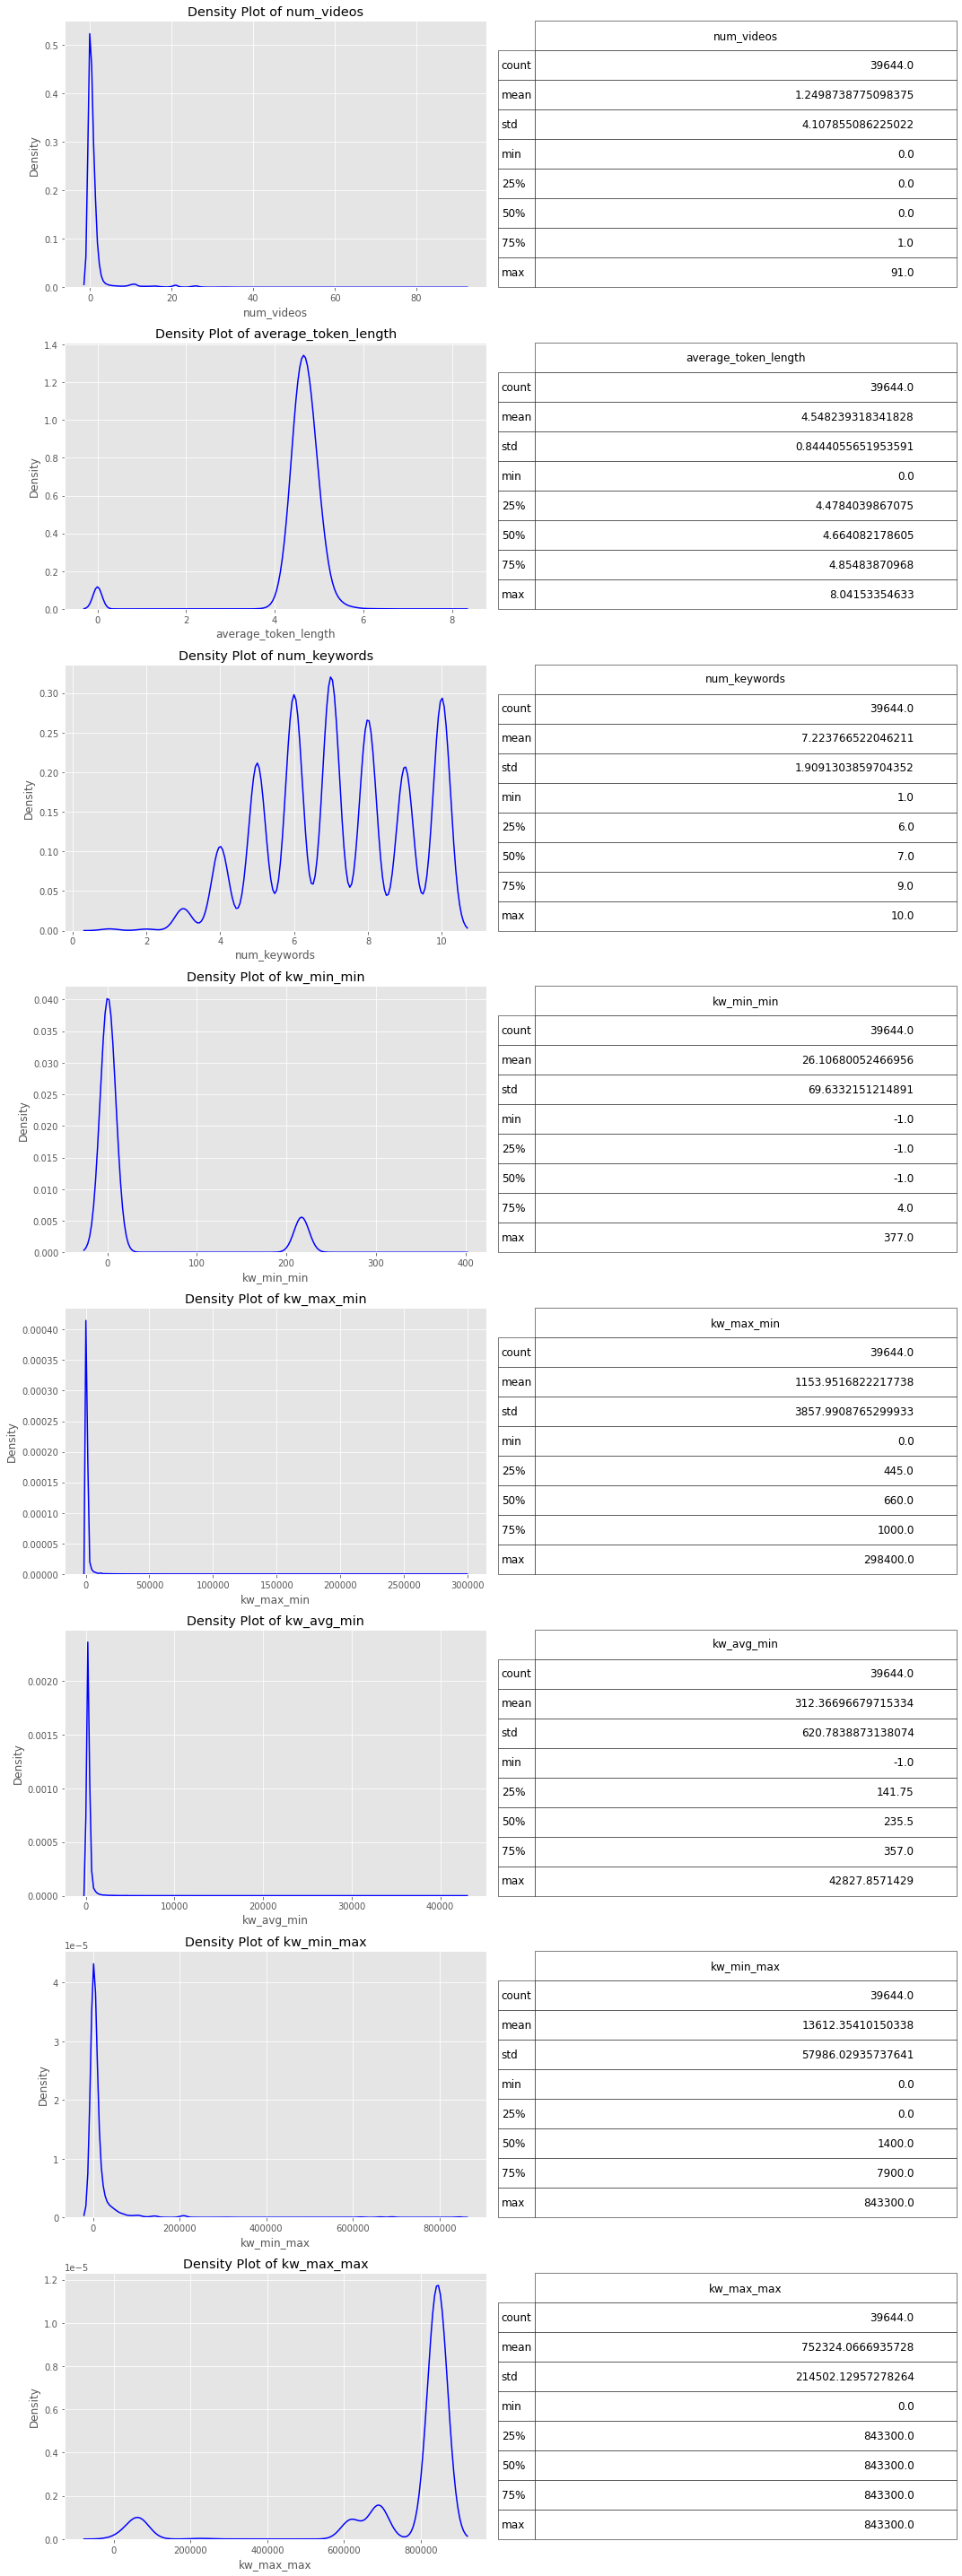

In [17]:
# seperating the features
features = [
    'num_videos', 'average_token_length', 'num_keywords',
    'kw_min_min', 'kw_max_min', 'kw_avg_min',
    'kw_min_max', 'kw_max_max']

plt.style.use('ggplot')


# Setting figure size
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 40))

# Initializing counter
idx = 0

# Looping through each feature and create a KDE plot + summary statistics table
for feature in features:
    sns.kdeplot(data=article_df, x=feature, color='blue', ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Density Plot of {feature}')
    axes[idx, 0].set_xlabel(feature)
    axes[idx, 0].set_ylabel('Density')

    # Getting summary statistics and converting to dataframe
    df_summary = article_df[feature].describe().to_frame()

    axes[idx, 1].axis('off')  # To hide axis for the table
    font_size = 12
    bbox = [0, 0, 1, 1]  # Table positioning inside the subplot
    mpl_table = axes[idx, 1].table(cellText=df_summary.values, rowLabels=df_summary.index, bbox=bbox, colLabels=df_summary.columns)
    
    # Adjusting the font size for the table
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    # Increment the counter for the next subplot
    idx += 1
    
# Display the plots
plt.tight_layout()
plt.show()


- In the plots above, the feature kw_max_max exhibits right skewness, indicating that its mean is greater than the median. On the other hand, the explanatory variables num_keywords and average_token_length are  normally distributed. All other features, except these, display left skewness.

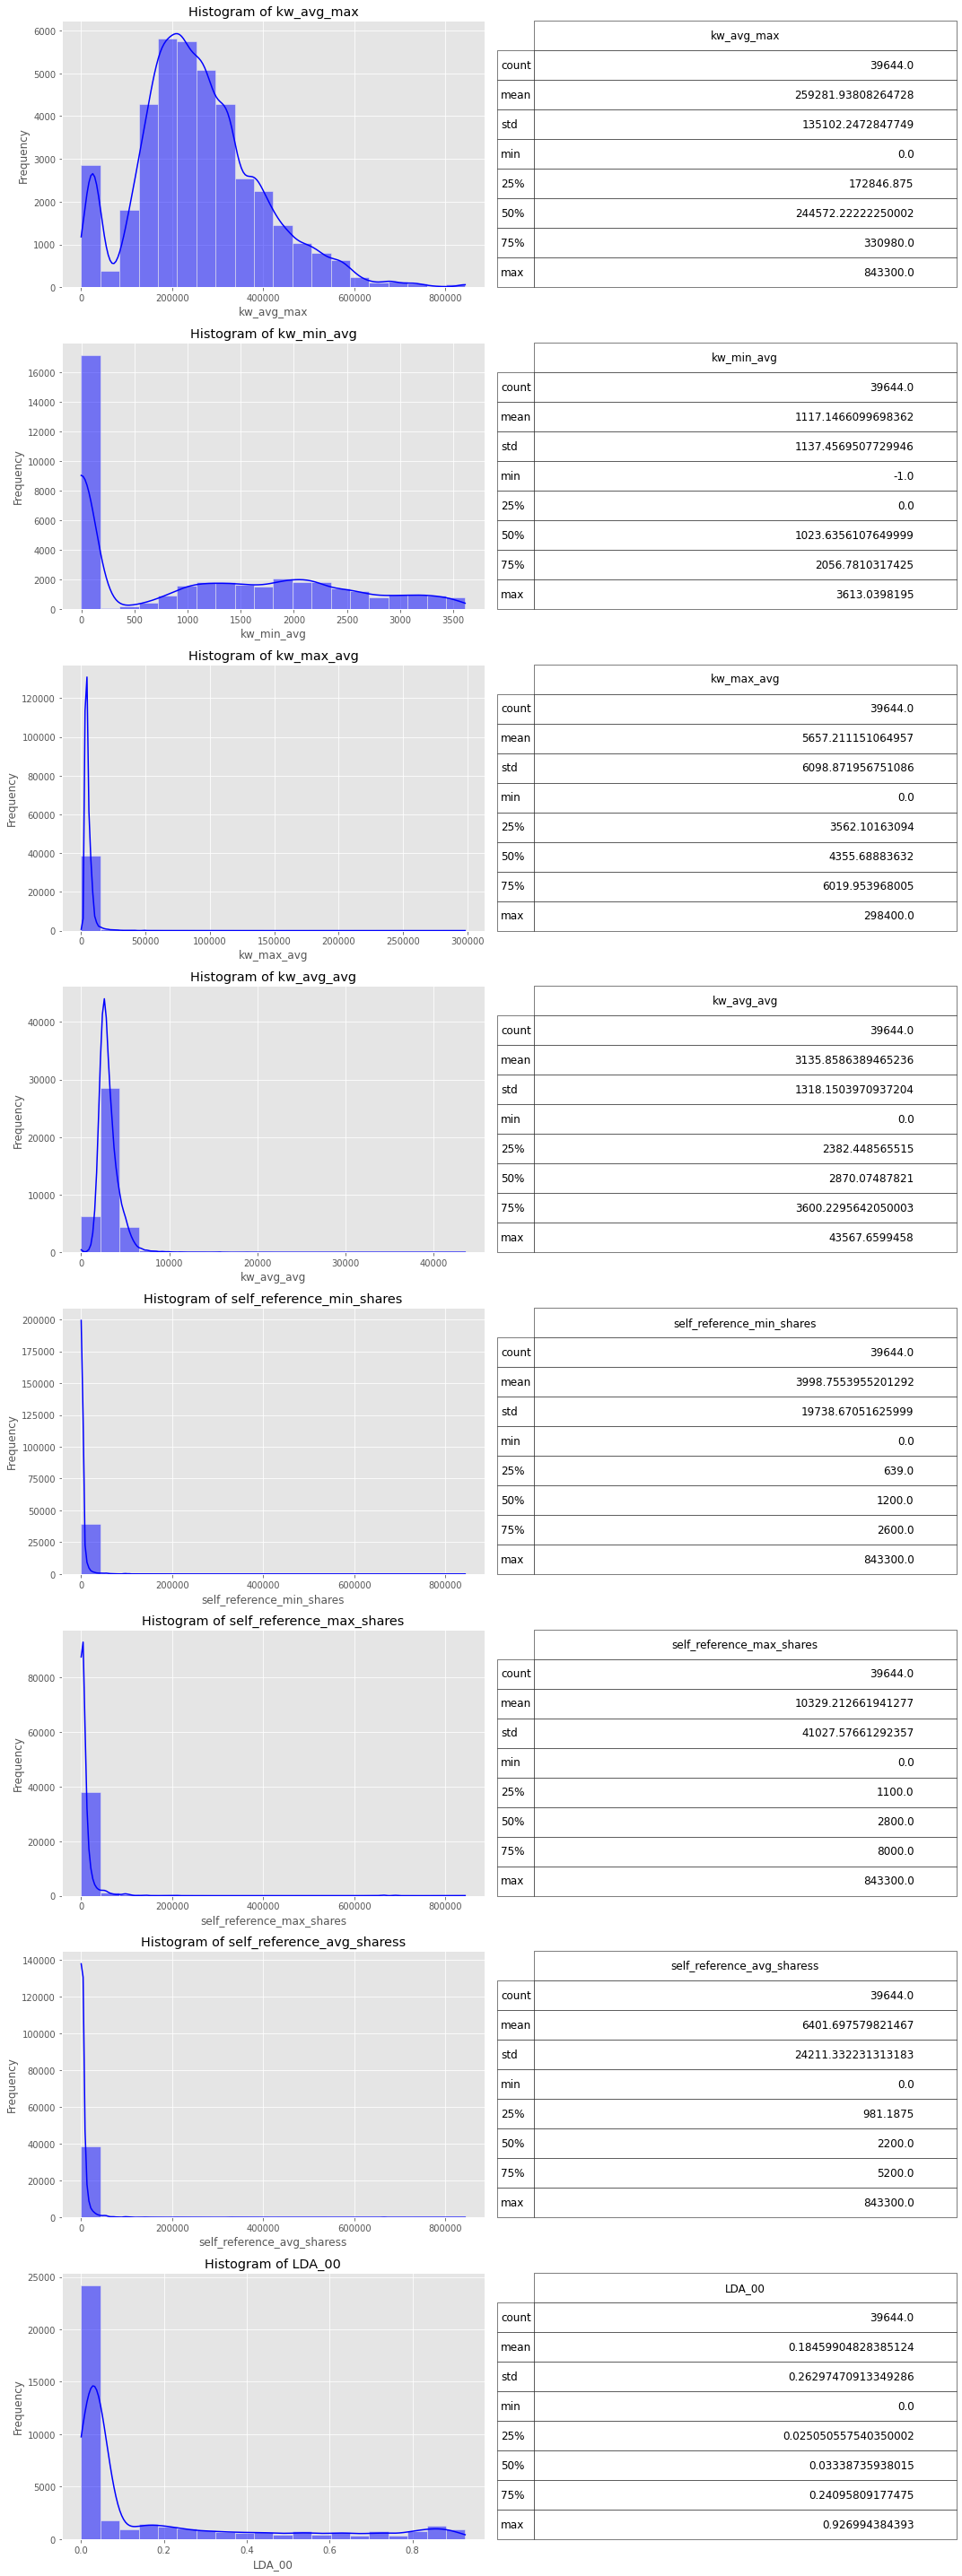

In [18]:
# seperating the features
features = [
    'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
    'self_reference_min_shares', 'self_reference_max_shares',
    'self_reference_avg_sharess', 'LDA_00']

# Setting figure size
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 40))

# Initializing counter
idx = 0


# Looping through each feature to create a histogram + summary statistics table
for feature in features:
    # Creating histogram
    sns.histplot(data=article_df, x=feature, bins=20, color='blue', kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Histogram of {feature}')
    axes[idx, 0].set_xlabel(feature)
    axes[idx, 0].set_ylabel('Frequency')

    # Getting summary statistics and converting to dataframe
    df_summary = article_df[feature].describe().to_frame()

    # Creating table for summary statistics
    axes[idx, 1].axis('off')  # Hide axis for the table
    font_size = 12
    bbox = [0, 0, 1, 1]  # Table positioning inside the subplot
    mpl_table = axes[idx, 1].table(cellText=df_summary.values, rowLabels=df_summary.index, bbox=bbox, colLabels=df_summary.columns)
    
    # Adjusting the font size for the table
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    # Increment the counter for the next subplot
    idx += 1

# Display  the plots
plt.tight_layout()
plt.show()


- In these plots, we observe a similar trend of left skewness for each variable, which implies median is greater than mean.

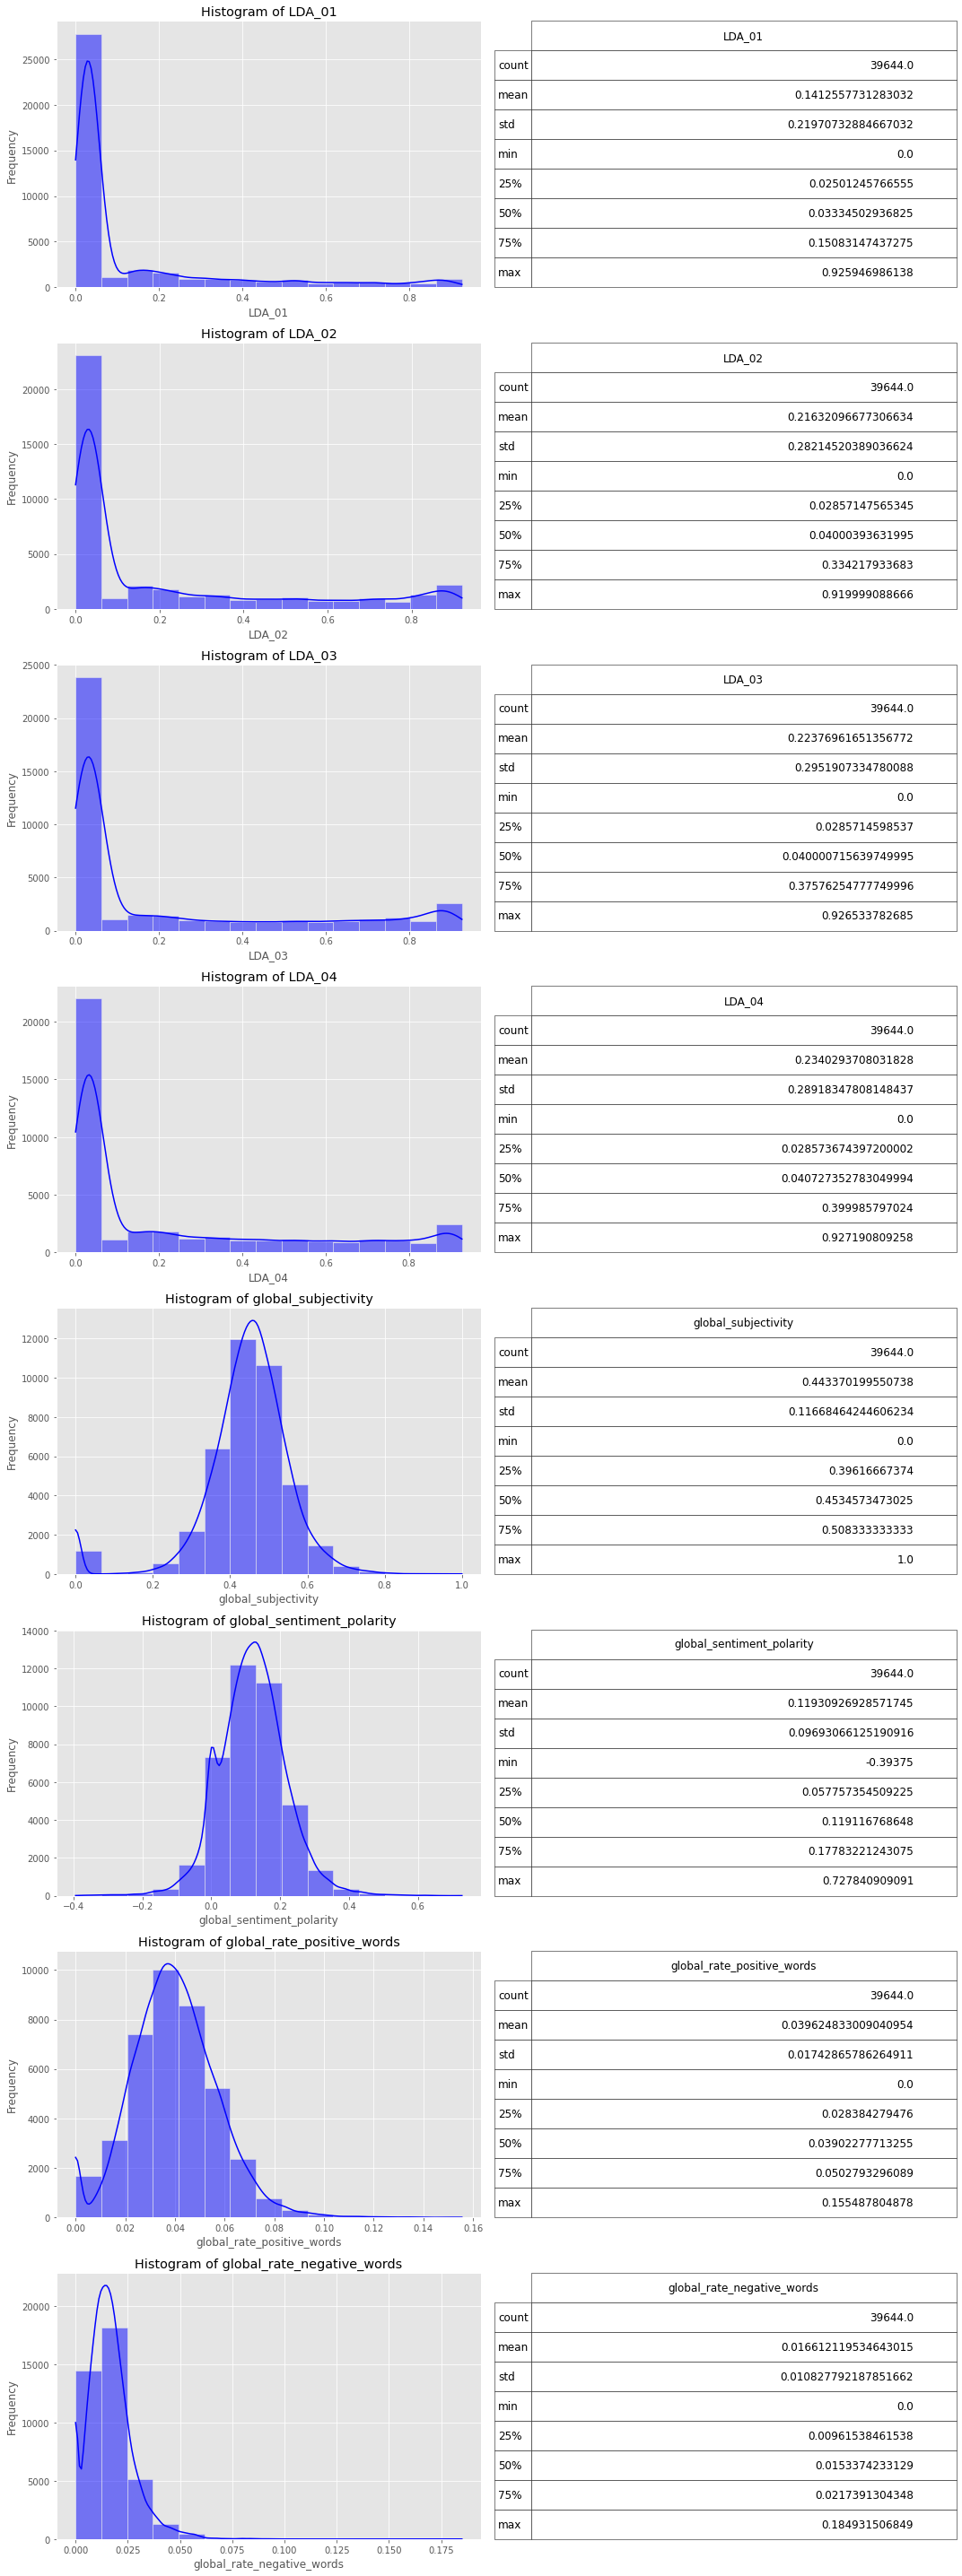

In [19]:
# seperating the features
features = [
    'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
    'global_subjectivity', 'global_sentiment_polarity',
    'global_rate_positive_words', 'global_rate_negative_words']

# Setting figure size
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 40))

# Initializing counter
idx = 0

# Applying the ggplot style
plt.style.use('ggplot')

# Looping through each feature to create a histogram + summary statistics table
for feature in features:
    if feature in article_df.columns:
        # Creating histogram
        sns.histplot(data=article_df, x=feature, bins=15, color='blue', kde=True, ax=axes[idx, 0])
        axes[idx, 0].set_title(f'Histogram of {feature}')
        axes[idx, 0].set_xlabel(feature)
        axes[idx, 0].set_ylabel('Frequency')

        # Getting summary statistics and converting to dataframe
        df_summary = article_df[feature].describe().to_frame()

        # Creating table for summary statistics
        axes[idx, 1].axis('off')  # Hide axis for the table
        font_size = 12
        bbox = [0, 0, 1, 1]  # Table positioning inside the subplot
        mpl_table = axes[idx, 1].table(cellText=df_summary.values, rowLabels=df_summary.index, bbox=bbox, colLabels=df_summary.columns)
        
        # Adjusting the font size for the table
        mpl_table.auto_set_font_size(False)
        mpl_table.set_fontsize(font_size)
    

    # Increment the counter for the next subplot
    idx += 1

#Display  the plots
plt.tight_layout()
plt.show()


- In the results, the histograms for global_sentiment_polarity and global_subjectivity display a normal distribution, indicating a bell-shaped curve typical of Gaussian distribution. In contrast, the other features exhibit a left-skewed trend, 

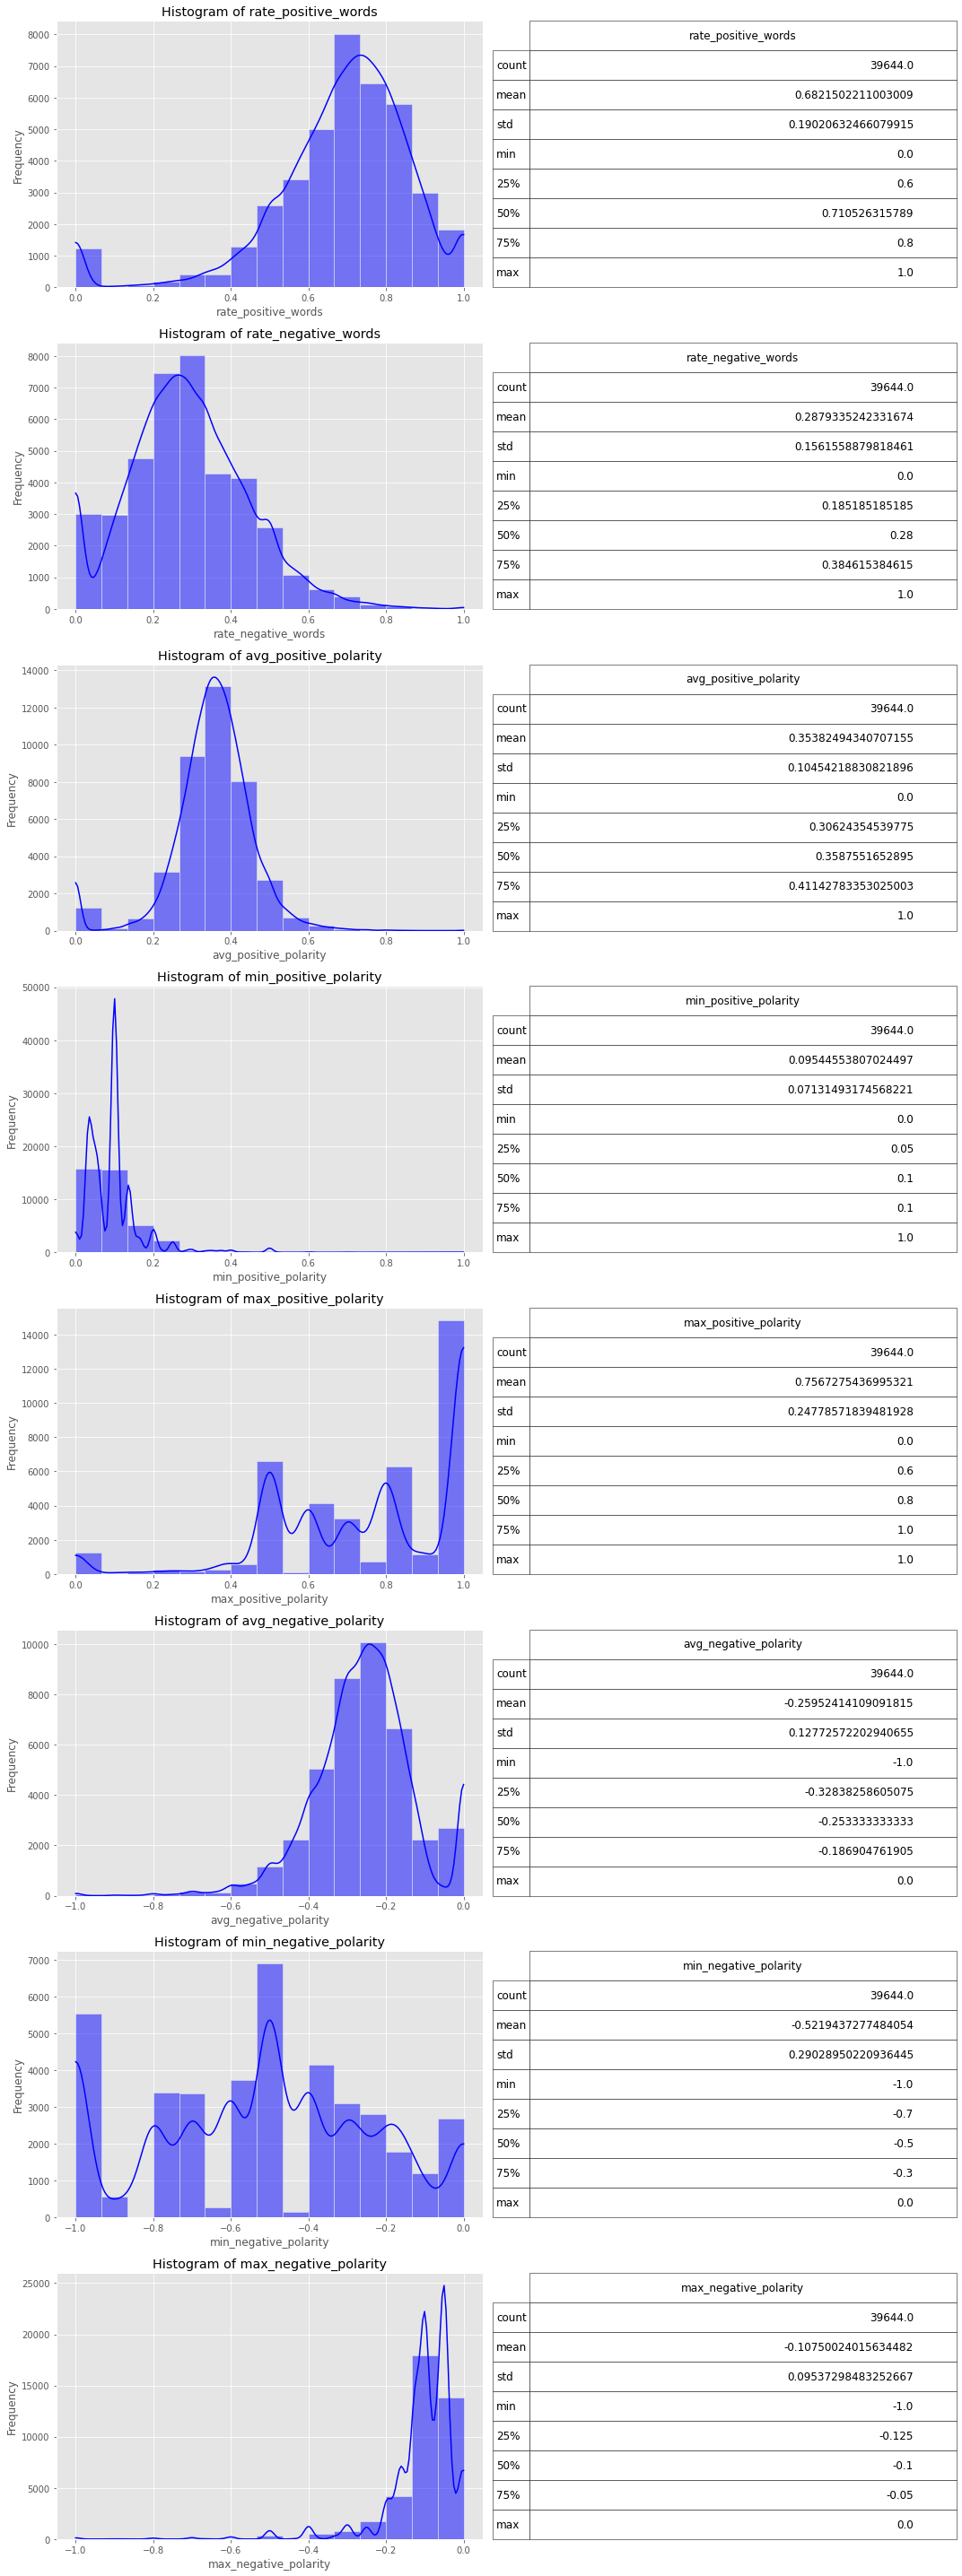

In [20]:
# seperating the features
features = [
    'rate_positive_words', 'rate_negative_words',
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
    'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity']

# Setting figure size
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 40))

# Initializing counter
idx = 0

# Applying the ggplot style
plt.style.use('ggplot')

# Looping through each feature to create a histogram + summary statistics table
for feature in features:
    if feature in article_df.columns:
        # Creating histogram
        sns.histplot(data=article_df, x=feature, bins=15, color='blue', kde=True, ax=axes[idx, 0])
        axes[idx, 0].set_title(f'Histogram of {feature}')
        axes[idx, 0].set_xlabel(feature)
        axes[idx, 0].set_ylabel('Frequency')

        # Getting summary statistics and converting to dataframe
        df_summary = article_df[feature].describe().to_frame()

        # Creating table for summary statistics
        axes[idx, 1].axis('off')  # Hide axis for the table
        font_size = 12
        bbox = [0, 0, 1, 1]  # Table positioning inside the subplot
        mpl_table = axes[idx, 1].table(cellText=df_summary.values, rowLabels=df_summary.index, bbox=bbox, colLabels=df_summary.columns)
        
        # Adjusting the font size for the table
        mpl_table.auto_set_font_size(False)
        mpl_table.set_fontsize(font_size)

    # Increment the counter for the next subplot
    idx += 1

# Display the plots
plt.tight_layout()
plt.show()


- The features rate_positive_words, avg_negative_polarity, and max_negative_polarity show right skewness, while rate_negative_words and min_positive_polarity exhibit left skewness in the data

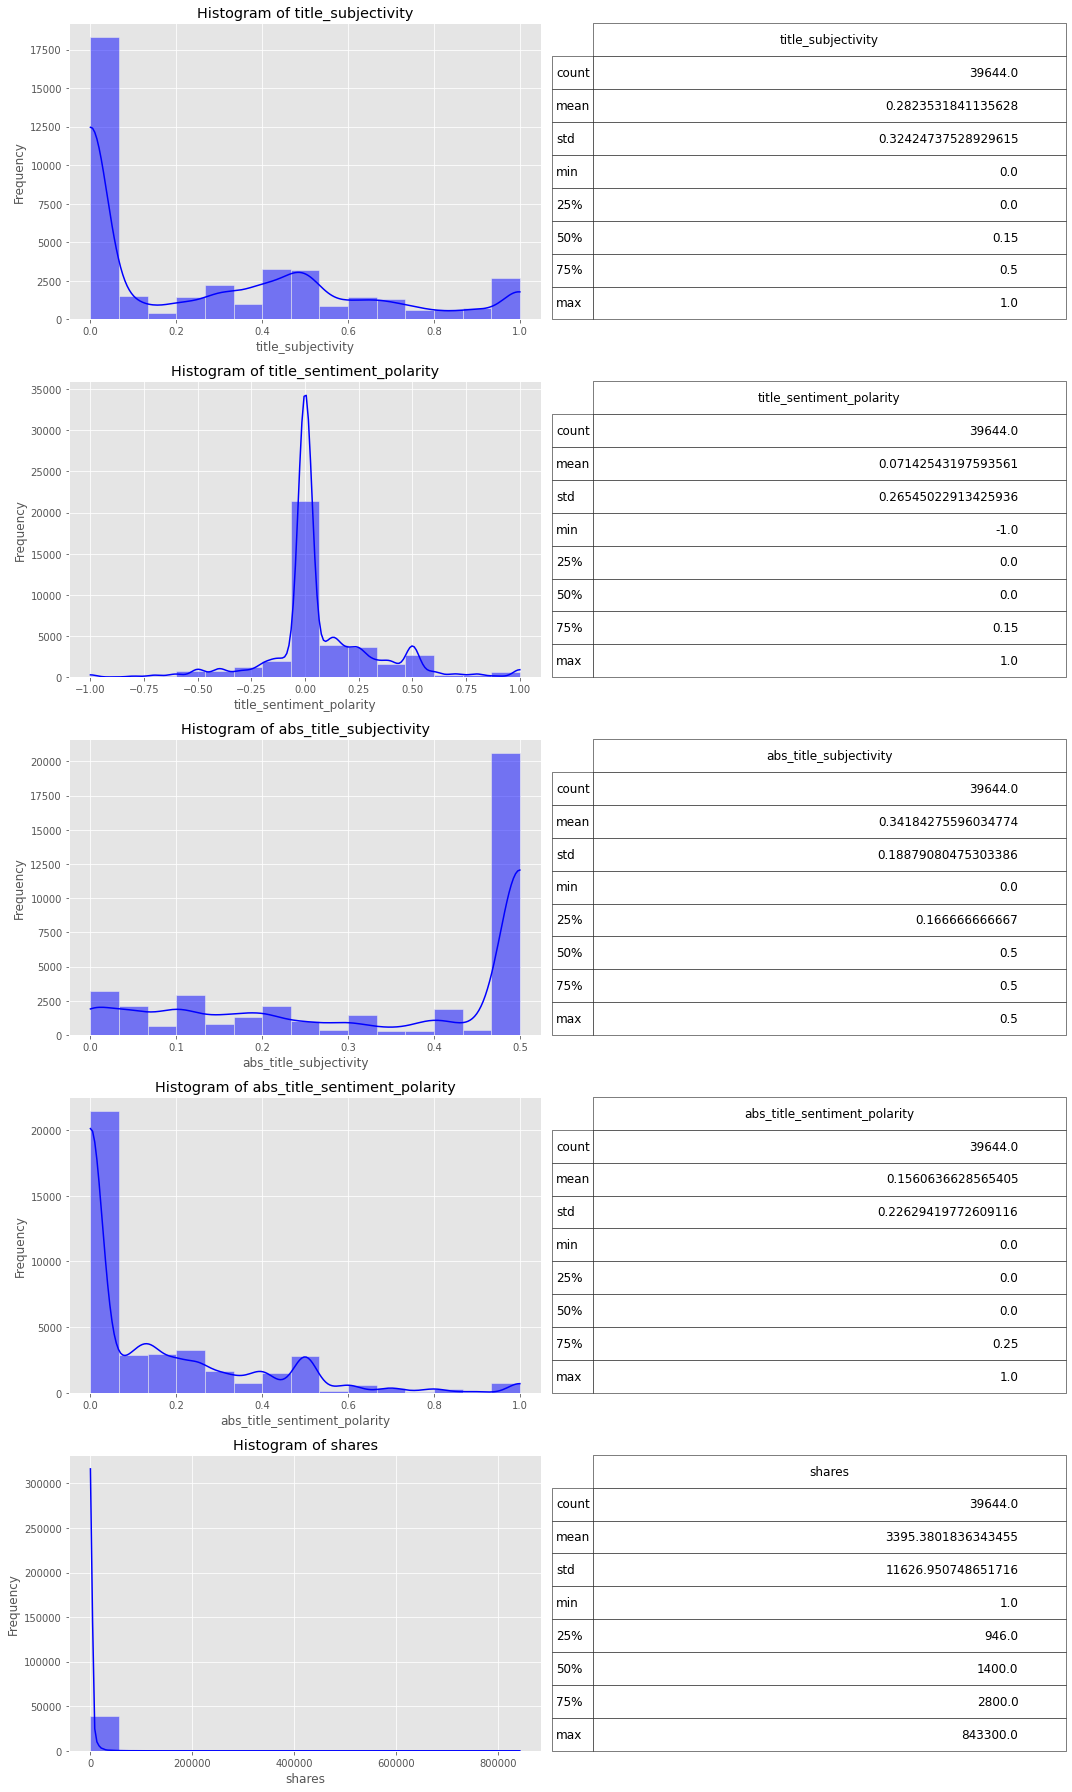

In [21]:
# seperating the features
features = [
    'title_subjectivity', 'title_sentiment_polarity',
    'abs_title_subjectivity', 'abs_title_sentiment_polarity',
    'shares']

# Setting figure size
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(15, len(features) * 5))

# Initializing counter
idx = 0

# Applying the ggplot style
plt.style.use('ggplot')

# Looping through each feature to create a histogram + summary statistics table
for feature in features:
    if feature in article_df.columns:
        # Creating histogram
        sns.histplot(data=article_df, x=feature, bins=15, color='blue', kde=True, ax=axes[idx, 0])
        axes[idx, 0].set_title(f'Histogram of {feature}')
        axes[idx, 0].set_xlabel(feature)
        axes[idx, 0].set_ylabel('Frequency')

        # Getting summary statistics and converting to dataframe
        df_summary = article_df[feature].describe().to_frame()

        # Creating table for summary statistics
        axes[idx, 1].axis('off')  # Hide axis for the table
        font_size = 12
        bbox = [0, 0, 1, 1]  # Table positioning inside the subplot
        mpl_table = axes[idx, 1].table(cellText=df_summary.values, rowLabels=df_summary.index, bbox=bbox, colLabels=df_summary.columns)
        
        # Adjusting the font size for the table
        mpl_table.auto_set_font_size(False)
        mpl_table.set_fontsize(font_size)

    # Increment the counter for the next subplot
    idx += 1

# Display the plots
plt.tight_layout()
plt.show()


- We have a normal distribution for title_sentiment_polarity. All other features listed above are either left-skewed or right-skewed.

https://stackoverflow.com/questions/54895350/how-to-plot-a-histogram-and-describe-it-side-by-side-in-python. We used this code in the website for above plots

<b> [Back to Content](#Content) </b>

### Univariate Analysis for Binary features

In [22]:
# Looping through each columm
for col in article_df.columns:
    # Check if the column contains only values 0 and 1
    unique_values = article_df[col].unique()
    
    # If the unique values are [0, 1] or [1, 0] display it
    if set(unique_values) == {0, 1}:
        print(col)



data_channel_is_lifestyle
data_channel_is_entertainment
data_channel_is_bus
data_channel_is_socmed
data_channel_is_tech
data_channel_is_world
weekday_is_monday
weekday_is_tuesday
weekday_is_wednesday
weekday_is_thursday
weekday_is_friday
weekday_is_saturday
weekday_is_sunday
is_weekend


- These are the binary variables in the DataFrame. We will plot a bar chart for each feature to visualize their distributions.

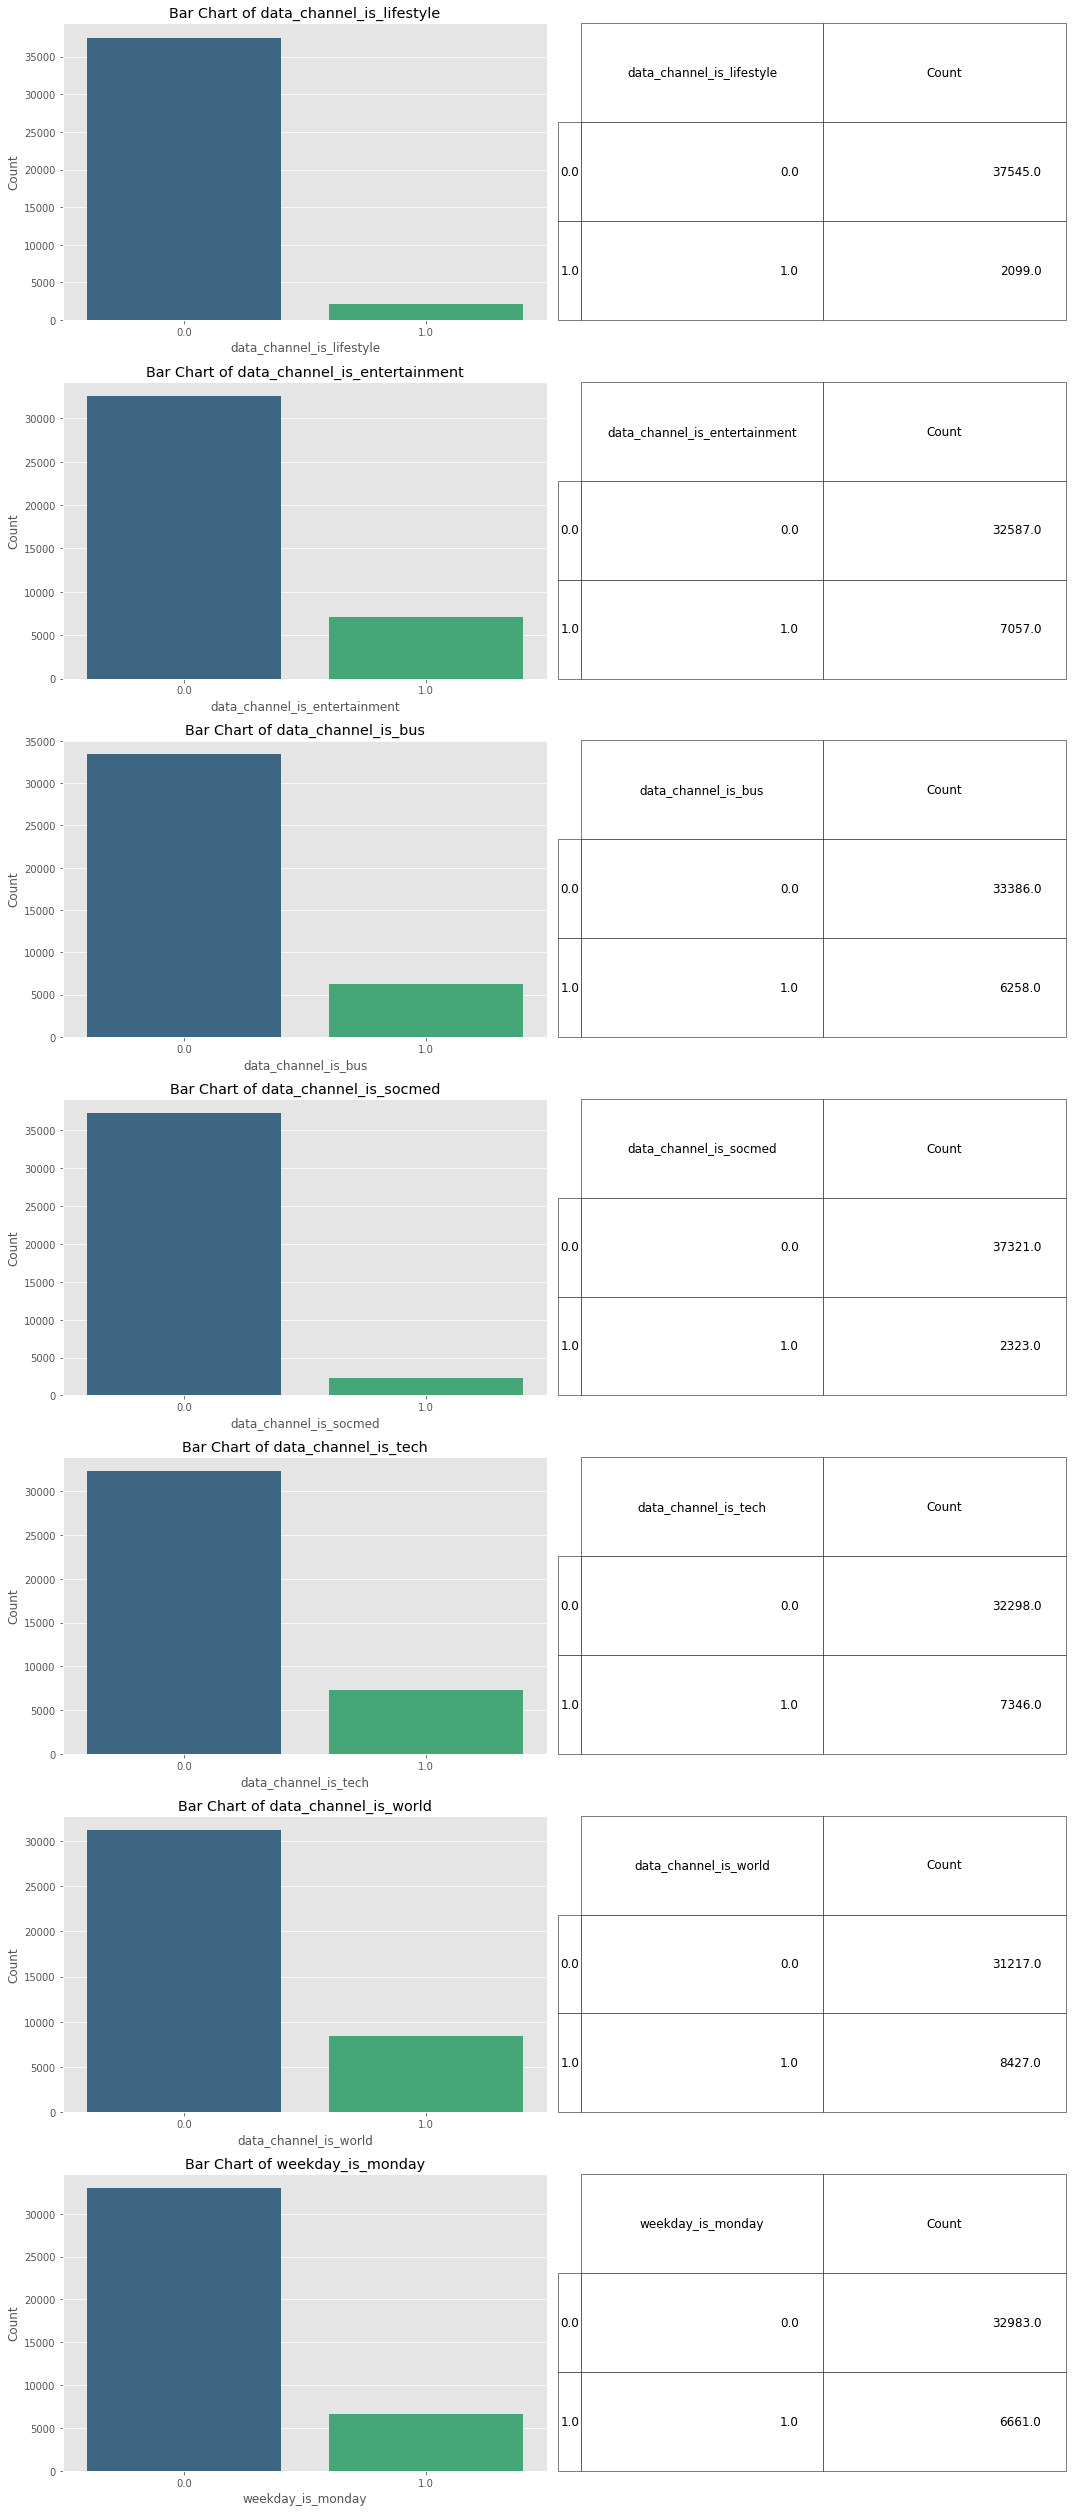

In [23]:
# Taking the first seven features
features = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed',
'data_channel_is_tech','data_channel_is_world','weekday_is_monday']

# Setting figure size
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(15, len(features) * 5))

# Applying the ggplot style
plt.style.use('ggplot')

# Looping through each feature to create a bar chart + summary statistics table
for idx, feature in enumerate(features):
    if feature in article_df.columns:
        # Creating bar chart
        sns.countplot(data=article_df, x=feature, ax=axes[idx, 0], palette='viridis')
        axes[idx, 0].set_title(f'Bar Chart of {feature}')
        axes[idx, 0].set_xlabel(feature)
        axes[idx, 0].set_ylabel('Count')

        # Getting summary statistics for binary features (counts of each category)
        df_summary = article_df[feature].value_counts().reset_index()
        df_summary.columns = [feature, 'Count']

        # Creating table for summary statistics
        axes[idx, 1].axis('off')  # Hide axis for the table
        font_size = 12
        bbox = [0, 0, 1, 1]  # Table positioning inside the subplot
        mpl_table = axes[idx, 1].table(cellText=df_summary.values, rowLabels=df_summary[feature], bbox=bbox, colLabels=df_summary.columns)
        
        # Adjusting the font size for the table
        mpl_table.auto_set_font_size(False)
        mpl_table.set_fontsize(font_size)

# Display the plots
plt.tight_layout()
plt.show()


- In all of these binary features, the count of the binary value 1 is significantly less than the count of 0, being less than half of the zero values.

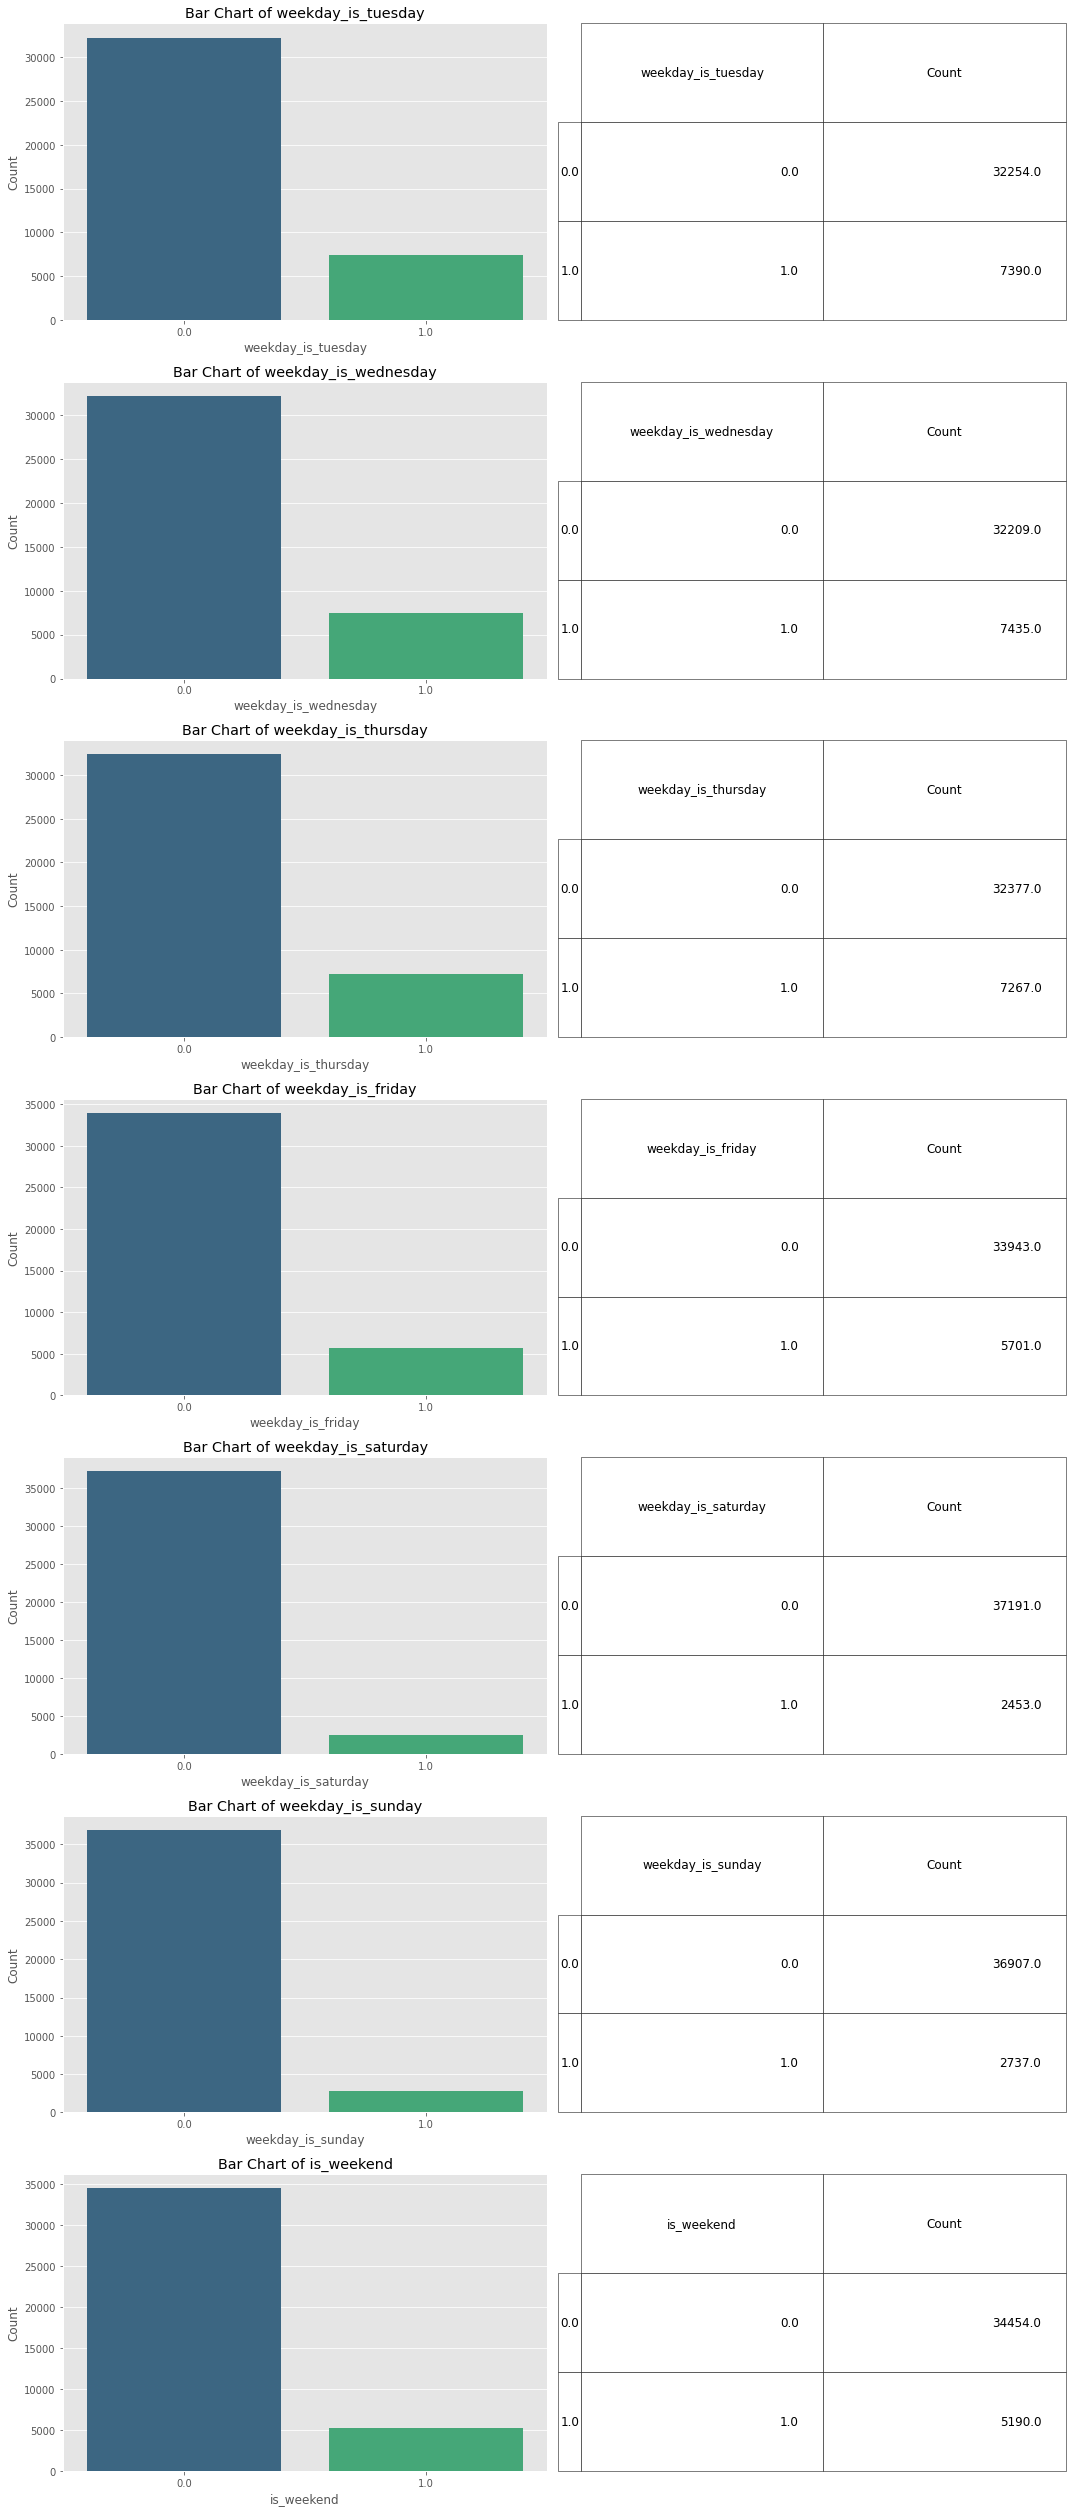

In [24]:
# Taking the remaining features
features = [
    'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
    'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
    'is_weekend']

# Setting figure size
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(15, len(features) * 5))

# Applying the ggplot style
plt.style.use('ggplot')

# Looping through each feature to create a bar chart + summary statistics table
for idx, feature in enumerate(features):
    if feature in article_df.columns:
        # Creating bar chart
        sns.countplot(data=article_df, x=feature, ax=axes[idx, 0], palette='viridis')
        axes[idx, 0].set_title(f'Bar Chart of {feature}')
        axes[idx, 0].set_xlabel(feature)
        axes[idx, 0].set_ylabel('Count')

        # Getting summary statistics for binary features (counts of each category)
        df_summary = article_df[feature].value_counts().reset_index()
        df_summary.columns = [feature, 'Count']

        # Creating table for summary statistics
        axes[idx, 1].axis('off')  # Hide axis for the table
        font_size = 12
        bbox = [0, 0, 1, 1]  # Table positioning inside the subplot
        mpl_table = axes[idx, 1].table(cellText=df_summary.values, rowLabels=df_summary[feature], bbox=bbox, colLabels=df_summary.columns)
        
        # Adjusting the font size for the table
        mpl_table.auto_set_font_size(False)
        mpl_table.set_fontsize(font_size)

# Display the plots
plt.tight_layout()
plt.show()


- Again, in all of these binary features, the count of the binary value 1 is significantly less than the count of 0, being less than half of the zero values.

<b> [Back to Content](#Content) </b>

## Bivariate

<b> [Back to Content](#Content) </b>

## Multivariate

In [25]:
# Make a copy of dataframe for multivariate analysis and make a new column where all week days will be in 
# one column, and there :-
# 1 = weekday_is_monday
# 2 = weekday_is_tuesday
# 3 = weekday_is_wednesday
# 4 = weekday_is_thursday
# 5 = weekday_is_friday
# 6 = weekday_is_saturday
# 7 = weekday_is_sunday


df = article_df.copy()

df['day_of_week'] = df.apply(lambda row: (1 if row['weekday_is_monday'] == 1 else 
                                          2 if row['weekday_is_tuesday'] == 1 else 
                                          3 if row['weekday_is_wednesday'] == 1 else
                                          4 if row['weekday_is_thursday'] == 1 else
                                          5 if row['weekday_is_friday'] == 1 else
                                          6 if row['weekday_is_saturday'] == 1 else
                                          7 if row['weekday_is_sunday'] == 1 else None), axis=1)

In [26]:
# To check the unique values in day_of_week.
df.day_of_week.unique()

array([1, 2, 3, 4, 5, 6, 7])

- As the published article will be on unique days, so there will not be any collaps of data in the new column but still will cross verify it in the below code cell.

In [27]:
# To cross-verify the numbers of each week days from their respective columns.

a = article_df.weekday_is_monday[article_df.weekday_is_monday == 1].value_counts().iloc[0]
b = df[df.day_of_week == 1].day_of_week.value_counts().iloc[0]
print('Checked for Monday - ', a==b)

a = article_df.weekday_is_tuesday[article_df.weekday_is_tuesday == 1].value_counts().iloc[0]
b = df[df.day_of_week == 2].day_of_week.value_counts().iloc[0]
print('Checked for Tuesday - ', a==b)

a = article_df.weekday_is_wednesday[article_df.weekday_is_wednesday == 1].value_counts().iloc[0]
b = df[df.day_of_week == 3].day_of_week.value_counts().iloc[0]
print('Checked for Wednesday - ', a==b)

a = article_df.weekday_is_thursday[article_df.weekday_is_thursday == 1].value_counts().iloc[0]
b = df[df.day_of_week == 4].day_of_week.value_counts().iloc[0]
print('Checked for Thursday - ', a==b)

a = article_df.weekday_is_friday[article_df.weekday_is_friday == 1].value_counts().iloc[0]
b = df[df.day_of_week == 5].day_of_week.value_counts().iloc[0]
print('Checked for Friday - ', a==b)

a = article_df.weekday_is_saturday[article_df.weekday_is_saturday == 1].value_counts().iloc[0]
b = df[df.day_of_week == 6].day_of_week.value_counts().iloc[0]
print('Checked for Saturday - ', a==b)

a = article_df.weekday_is_sunday[article_df.weekday_is_sunday == 1].value_counts().iloc[0]
b = df[df.day_of_week == 7].day_of_week.value_counts().iloc[0]
print('Checked for Sunday - ', a==b)

Checked for Monday -  True
Checked for Tuesday -  True
Checked for Wednesday -  True
Checked for Thursday -  True
Checked for Friday -  True
Checked for Saturday -  True
Checked for Sunday -  True


- So, we have verified that there isn't any collaps.

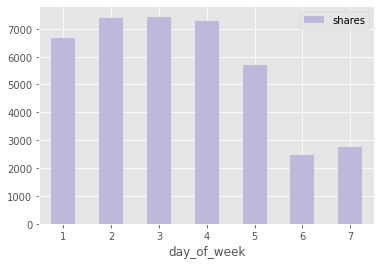

In [28]:
# Just for understanding about the new column, plot the barplot for day of week with respect to shares.

df.groupby('day_of_week')[['shares']].count().plot.bar(color='#beb9db')
plt.xticks(rotation=1)
plt.show()

- As per the graph, we can conclude that:- 
    - Wednesday, followed by tuesday, and then thursday has the max counts
    - monday, & then friday are with the moderate counts
    - weekends has the least counts

In [29]:
# Make a new column where all types of channel will be in one column, and there:-
# Lifestyle = data_channel_is_lifestyle
# Entertainment = data_channel_is_entertainment
# Bus = data_channel_is_bus
# SocMed = data_channel_is_socmed
# Tech = data_channel_is_tech
# World = data_channel_is_world
# Others = if the data where all channels type is zero(0), then 'Others'. 

df['data_channels'] = df.apply(lambda row: ('Lifestyle' if row['data_channel_is_lifestyle'] == 1 else 
                                          'Entertainment' if row['data_channel_is_entertainment'] == 1 else 
                                          'Bus' if row['data_channel_is_bus'] == 1 else
                                          'SocMed' if row['data_channel_is_socmed'] == 1 else
                                          'Tech' if row['data_channel_is_tech'] == 1 else
                                          'World' if row['data_channel_is_world'] == 1 else 'Others'), axis=1)

In [30]:
# To check the unique values in data_channels.
df.data_channels.unique()

array(['Entertainment', 'Bus', 'Tech', 'Lifestyle', 'World', 'Others',
       'SocMed'], dtype=object)

In [31]:
# Check if the data is null or not.

df.data_channels.isnull().value_counts()

data_channels
False    39644
Name: count, dtype: int64

- No Nulls are present.

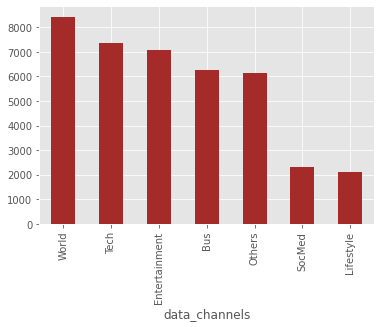

In [32]:
# Just for understanding about the new column, will plot a barplot.

plt.style.use('ggplot')

df.data_channels.value_counts().plot.bar(color='brown')
plt.show()

- We can clearly see that count of world is max and least for lifestyle.

In [33]:
# We group day_of_week and data_channels with target variable to see the counts of shares on each day.
df.groupby(['day_of_week', 'data_channels'])['shares'].count().unstack()

data_channels,Bus,Entertainment,Lifestyle,Others,SocMed,Tech,World
day_of_week,,,,,,,
1,1153,1358,322,900,337,1235,1356
2,1182,1285,334,1111,458,1474,1546
3,1271,1295,388,1083,416,1417,1565
4,1234,1231,358,1102,463,1310,1569
5,832,972,305,966,332,989,1305
6,243,380,182,424,180,525,519
7,343,536,210,548,137,396,567


- With the below color code we can observe more clearly.

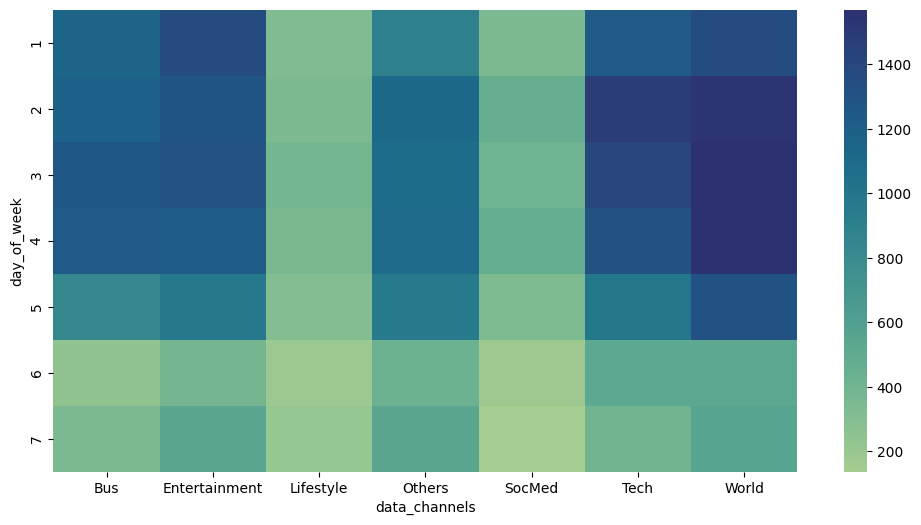

In [34]:
# with the color code from heatmap can clearly states which has the max and min counts of shares with respect to
# day_of_week, and data_channels

plt.style.use('default')
plt.figure(figsize=(12,6))
sns.heatmap(df.groupby(['day_of_week', 'data_channels'])['shares'].count().unstack(), cmap='crest')
plt.show()

- We can indentify from the color coding that which day which channels has the most or lest counts.

<b> [Back to Content](#Content) </b>

---------

## Data Cleaning

### Handling Outliers

In [35]:
# making a copy of the dataset
lx=article_df.copy()
lx

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


## Checking for outliers


In [36]:

numeric_colm = [
    'n_tokens_title',
    'n_tokens_content',
    'n_unique_tokens',
    'n_non_stop_words',
    'n_non_stop_unique_tokens',
    'num_hrefs',
    'num_self_hrefs',
    'num_imgs',
    'num_videos',
    'average_token_length',
    'num_keywords',
    'kw_min_min',
    'kw_max_min',
    'kw_avg_min',
    'kw_min_max',
    'kw_max_max',
    'kw_avg_max',
    'kw_min_avg',
    'kw_max_avg',
    'kw_avg_avg',
    'self_reference_min_shares',
    'self_reference_max_shares',
    'self_reference_avg_sharess', 
    'LDA_00',
    'LDA_01',
    'LDA_02',
    'LDA_03',
    'LDA_04',
    'global_subjectivity',
    'global_sentiment_polarity',
    'global_rate_positive_words',
    'global_rate_negative_words',
    'rate_positive_words',
    'rate_negative_words',
    'avg_positive_polarity',
    'min_positive_polarity',
    'max_positive_polarity',
    'avg_negative_polarity',
    'min_negative_polarity',
    'max_negative_polarity',
    'title_subjectivity',
    'title_sentiment_polarity',
    'abs_title_subjectivity',
    'abs_title_sentiment_polarity',
    'shares'
]

# Looping through numeric columns and detect outliers
for col in numeric_colm:
    # checking for  the column exists in the DataFrame to avoid error
    if col in lx.columns:
        # Outliers detection
        q1 = np.quantile(lx[col], 0.25)
        q3 = np.quantile(lx[col], 0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        outlier = (lx[col] < lower_bound) | (lx[col] > upper_bound)

        # Display outliers information
        if outlier.sum() > 0:
            print(f'Outliers Detected in {col}!')
            print('Outliers%: {}'.format(round(100 * outlier.mean(), 2)))


Outliers Detected in n_tokens_title!
Outliers%: 0.39
Outliers Detected in n_tokens_content!
Outliers%: 4.88
Outliers Detected in n_unique_tokens!
Outliers%: 4.05
Outliers Detected in n_non_stop_words!
Outliers%: 7.13
Outliers Detected in n_non_stop_unique_tokens!
Outliers%: 4.37
Outliers Detected in num_hrefs!
Outliers%: 5.47
Outliers Detected in num_self_hrefs!
Outliers%: 5.27
Outliers Detected in num_imgs!
Outliers%: 19.43
Outliers Detected in num_videos!
Outliers%: 7.43
Outliers Detected in average_token_length!
Outliers%: 4.24
Outliers Detected in num_keywords!
Outliers%: 0.13
Outliers Detected in kw_min_min!
Outliers%: 11.8
Outliers Detected in kw_max_min!
Outliers%: 9.23
Outliers Detected in kw_avg_min!
Outliers%: 5.25
Outliers Detected in kw_min_max!
Outliers%: 12.77
Outliers Detected in kw_max_max!
Outliers%: 23.81
Outliers Detected in kw_avg_max!
Outliers%: 2.42
Outliers Detected in kw_max_avg!
Outliers%: 6.03
Outliers Detected in kw_avg_avg!
Outliers%: 4.11
Outliers Detected 

- From this, it is evident that the majority of the features contain outliers, ranging from 0.38% to a maximum of 23.83%.So in next step using box-cox method  to handle the outliers.

In [37]:
def transform(colm):
    """
    Applies the Box-Cox transformation to a specified column after converting any negative 
    values and zeros to their absolute values.

    Parameters:
    colm : The name of the column in the DataFrame to be transformed.
    
    """
    
    # Check if there are any negative values or zero values
    if (lx[colm] < 0).any():
        print(f"Column '{colm}' contains negative values. Taking absolute values.")
        # Take the absolute value of the column to make all values non-negative
        lx[colm] = lx[colm].abs()
    
    # Apply Box-Cox transformation (shift the data by adding 1 to avoid zero values)
    lx[colm], lambda_val = boxcox(lx[colm] + 1)
    
    # Print the lambda value used for Box-Cox transformation
    print(f"Lambda value for {colm}: {lambda_val}")


In [38]:
# calling the function
for col in numeric_colm:
    transform(col)
    


Lambda value for n_tokens_title: 0.6986709138786702
Lambda value for n_tokens_content: 0.38045297261832045
Lambda value for n_unique_tokens: -0.14060640847498718
Lambda value for n_non_stop_words: 0.045369086810794955
Lambda value for n_non_stop_unique_tokens: -0.04223668192143984
Lambda value for num_hrefs: 0.07009704867146853
Lambda value for num_self_hrefs: -0.030285748977114266
Lambda value for num_imgs: -0.5438055816983267
Lambda value for num_videos: -1.6046962535919624
Lambda value for average_token_length: 4.309987923379092
Lambda value for num_keywords: 1.1524379646653073
Column 'kw_min_min' contains negative values. Taking absolute values.
Lambda value for kw_min_min: -0.8569680308612493
Lambda value for kw_max_min: 0.19750427100387832
Column 'kw_avg_min' contains negative values. Taking absolute values.
Lambda value for kw_avg_min: 0.25063079189814824
Lambda value for kw_min_max: 0.024676482738809957
Lambda value for kw_max_max: 2.9283216186653687
Lambda value for kw_avg_max

In [39]:
# storing the  column in a separate variable
shares = lx['shares']

# dropping the shares column
X = lx.drop('shares', axis=1)

# Display the datframe
X.head(2)


#shares.head(2)


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,7.158988,17.830379,0.491195,0.704161,0.588851,1.703736,1.080537,0.577487,0.0,413.649982,...,0.498584,0.068282,1.560913,0.297332,0.554665,0.105855,0.281874,0.115887,0.000000,0.115887
1,5.720229,19.044656,0.457580,0.704161,0.576176,1.455887,0.685922,0.577487,0.0,492.075229,...,0.354744,0.029099,1.560913,0.111823,0.122675,0.070674,0.000000,0.000000,1.168618,0.000000


<b> [Back to Content](#Content) </b>

--------

## Feature Selection / Dimensionality Reduction 

## Variance Threshold

- Variance Threshold is a method that filters out features with little variation, as they are often less useful for predicting outcomes in machine learning models.

In [40]:
from sklearn.feature_selection import VarianceThreshold

# Creating the VarianceThreshold object (remove features with variance below the threshold)
selector = VarianceThreshold(threshold=0.01)

# Fit the selector to the data
selector.fit(X)

selector.get_support()

#get the list of eaturs with low variance
lowvar_col = [column for column in X.columns if column not in X.columns[selector.get_support()]]

print("Features with Low Variance:")
print(lowvar_col)

Features with Low Variance:
['n_unique_tokens', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'min_positive_polarity', 'avg_negative_polarity', 'max_negative_polarity', 'title_sentiment_polarity', 'abs_title_sentiment_polarity']


- Since these features have low variance, they will be dropped to improve the performance of the machine learning model.  reference: https://medium.com/nerd-for-tech/removing-constant-variables-feature-selection-463e2d6a30d9

In [41]:
#drop low variance columns
X = X.drop(lowvar_col,axis=1)

X.head()

,n_tokens_title,n_tokens_content,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,weekday_is_sunday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,avg_positive_polarity,max_positive_polarity,min_negative_polarity,title_subjectivity,abs_title_subjectivity
0,7.158988,17.830379,0.704161,0.588851,1.703736,1.080537,0.577487,0.0,413.649982,5.973808,...,0.0,0.0,1.035903,2.143039,0.206523,0.498584,1.560913,0.554665,0.281874,0.000000
1,5.720229,19.044656,0.704161,0.576176,1.455887,0.685922,0.577487,0.0,492.075229,4.677280,...,0.0,0.0,0.540573,1.957377,0.234943,0.354744,1.560913,0.122675,0.000000,1.168618
2,5.720229,17.544086,0.704161,0.503708,1.455887,0.685922,0.577487,0.0,330.770177,7.303844,...,0.0,0.0,1.727615,2.646708,0.133069,0.705438,2.990175,0.724041,0.000000,1.168618
3,5.720229,25.998842,0.704161,0.504748,2.498823,0.000000,0.577487,0.0,333.831219,8.663256,...,0.0,0.0,0.762077,1.641271,0.285542,0.510751,1.973298,0.554665,0.000000,1.168618
4,7.615483,34.756753,0.704161,0.428436,3.333495,2.863852,1.487715,0.0,414.426369,8.663256,...,0.0,0.0,1.009733,2.665625,0.130396,0.553295,2.990175,0.467502,0.267303,0.049258


## Principal Component Analysis

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# binary_columns in datframe
article_numeric_df_2= [
    'data_channel_is_lifestyle',
    'data_channel_is_entertainment',
    'data_channel_is_bus',
    'data_channel_is_socmed',
    'data_channel_is_tech',
    'data_channel_is_world',
    'weekday_is_monday',
    'weekday_is_tuesday',
    'weekday_is_wednesday',
    'weekday_is_thursday',
    'weekday_is_friday',
    'weekday_is_saturday',
    'weekday_is_sunday',
    'is_weekend'
]

# Dropping the specified columns from DataFrame X
X = X.drop(columns= article_numeric_df_2)


X.head()


,n_tokens_title,n_tokens_content,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,self_reference_max_shares,self_reference_avg_sharess,global_subjectivity,rate_positive_words,rate_negative_words,avg_positive_polarity,max_positive_polarity,min_negative_polarity,title_subjectivity,abs_title_subjectivity
0,7.158988,17.830379,0.704161,0.588851,1.703736,1.080537,0.577487,0.0,413.649982,5.973808,...,11.757131,12.643654,1.035903,2.143039,0.206523,0.498584,1.560913,0.554665,0.281874,0.000000
1,5.720229,19.044656,0.704161,0.576176,1.455887,0.685922,0.577487,0.0,492.075229,4.677280,...,0.000000,0.000000,0.540573,1.957377,0.234943,0.354744,1.560913,0.122675,0.000000,1.168618
2,5.720229,17.544086,0.704161,0.503708,1.455887,0.685922,0.577487,0.0,330.770177,7.303844,...,13.846324,15.016583,1.727615,2.646708,0.133069,0.705438,2.990175,0.724041,0.000000,1.168618
3,5.720229,25.998842,0.704161,0.504748,2.498823,0.000000,0.577487,0.0,333.831219,8.663256,...,0.000000,0.000000,0.762077,1.641271,0.285542,0.510751,1.973298,0.554665,0.000000,1.168618
4,7.615483,34.756753,0.704161,0.428436,3.333495,2.863852,1.487715,0.0,414.426369,8.663256,...,27.450742,20.789946,1.009733,2.665625,0.130396,0.553295,2.990175,0.467502,0.267303,0.049258


- Since Principal Component Analysis (PCA) is designed for numerical features, we have removed the categorical columns from our dataset.In order to enhance our ability to investigate and show the underlying patterns and correlations in the data, we make sure that our PCA transformation only concentrates on the numerical characteristics.

In [43]:
# Convert shares  to a DataFrame
shares_df = shares.to_frame()

# Joining 'shares_df with X
X_with_shares = pd.concat([X, shares_df], axis=1)


X_with_shares.head(2)



,n_tokens_title,n_tokens_content,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,self_reference_avg_sharess,global_subjectivity,rate_positive_words,rate_negative_words,avg_positive_polarity,max_positive_polarity,min_negative_polarity,title_subjectivity,abs_title_subjectivity,shares
0,7.158988,17.830379,0.704161,0.588851,1.703736,1.080537,0.577487,0.0,413.649982,5.973808,...,12.643654,1.035903,2.143039,0.206523,0.498584,1.560913,0.554665,0.281874,0.000000,3.43326
1,5.720229,19.044656,0.704161,0.576176,1.455887,0.685922,0.577487,0.0,492.075229,4.677280,...,0.000000,0.540573,1.957377,0.234943,0.354744,1.560913,0.122675,0.000000,1.168618,3.47694


In [44]:
# assign the explanatory variables to a Python object without the target column.
X_1 = X_with_shares.iloc[:, :-1]   

# assign the response variable to a Python object
y = X_with_shares.shares

# standarise the data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_1)


In [45]:
# create an instance of a PCA model, and set the components to 30
pca = PCA(n_components=30)

# apply the pca and transform it to 30 principal components per observation of the standarised data
X_pca = pca.fit(X_scaled)

# display the explained variance ratio for the principal components we've derived from the data
print(np.round(pca.explained_variance_ratio_, 2)*100)

[17. 13.  9.  7.  7.  6.  6.  5.  4.  4.  3.  3.  3.  2.  2.  2.  2.  1.
  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.]


- To check the explained variance ratio.

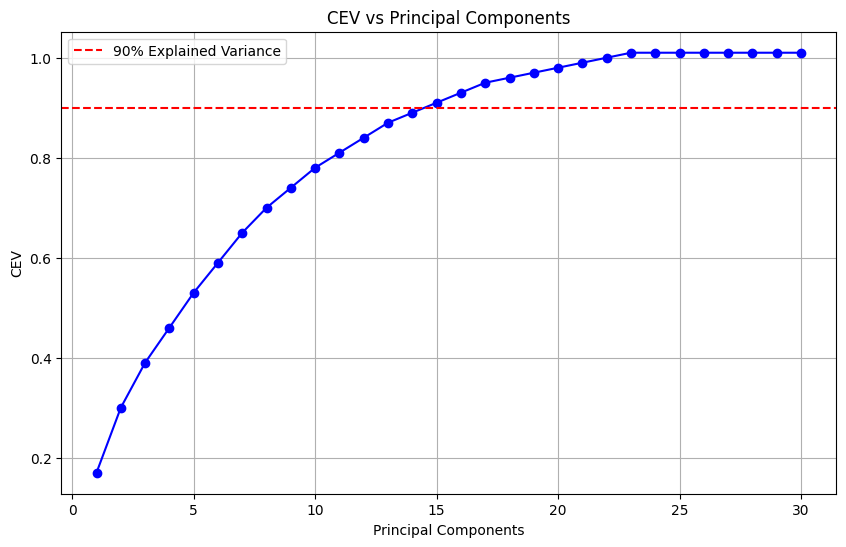

No. of components that explain 90% of the variance: 15


In [46]:
# explained variance ratio in percentage for all 30 numeric features
evp = np.array([17, 13, 9, 7, 7, 6, 6, 5, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 
                                          0, 0, 0, 0, 0, 0, 0])

# explained variance ratio
epr = evp / 100    

# cumulative explained variance
cev = np.cumsum(epr)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(epr) + 1), cev, marker='o', color = 'blue')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('CEV')
plt.title('CEV vs Principal Components')
plt.legend()
plt.grid(True)
plt.show()

# No. of components, which explain at least 90% of the variance
n_components = np.argmax(cev >= 0.90) + 1
print(f"No. of components that explain 90% of the variance: {n_components}")

In [47]:
# create an instance of a PCA model, and set the components to 15
pca = PCA(n_components=15)

#apply the results of the PCA to the testing data to transform it into 15 principal components per observation
X_t_pca = pca.fit_transform(X_scaled)

# Convert the nd array of X_pca to dataframe
X_t_pca = pd.DataFrame(X_t_pca, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 
                                     'pca_8', 'pca_9', 'pca_10', 'pca_1', 'pca_12', 'pca_13', 'pca_14', 
                                     'pca_15'])

# Combine the X_pca with the binary dataset article_binary_df.
X_final = pd.concat([X_t_pca, article_binary_df] , axis=1)

## Linear Regression Model Evaluation

In [48]:
from sklearn.model_selection import train_test_split  # Correct import for train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.4, random_state=100)

# Create an instance of a Linear Regression model
lr_model = LinearRegression()

# Fit the Linear Regression model to the transformed training data and the response data
lr_model.fit(X_train, y_train)

# Check the accuracy of the Linear Regression model using the test data
print('R^2 score:', lr_model.score(X_test, y_test))


R^2 score: 0.11859687426133803


## K_fold

In [49]:
# 10 k-fold splits for training dataset
kf = KFold(n_splits=10, shuffle=True, random_state=100)

# k-fold cross validation
cross_val_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='r2')

print(f"Cross-Val R^2 scores of training dataset : {cross_val_scores}")
print()
print(f"Mean R^2 score of training dataset : {np.mean(cross_val_scores)}")

Cross-Val R^2 scores of training dataset : [0.12787289 0.0951226  0.13830259 0.10998263 0.10475057 0.11123173
 0.11126044 0.11972869 0.11990357 0.10263847]

Mean R^2 score of training dataset : 0.11407941680725395


- Average of r^2 score of training dataset is  ->  0.11407941554270247 (approx 0.114 )

In [50]:
# test score of testing dataset
test_scores = lr_model.score(X_test, y_test)  # R² score on the test set
print(f"Test R^2 score : {test_scores}")

Test R^2 score : 0.11859687426133803


- Here we can clearly see that LR model is not performing well.

<b> [Back to Content](#Content) </b>

---------
# Conclusion

1) For this assignment, our primary task was to apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to include in a linear regression model that predicts the number of times an online news article will be shared. We followed the steps outlined in our methodology section.

2) We performed the variance threshold method by setting the threshold value to 0.01. We found that 15 features exhibited low variance and were removed for better performance.

3) Next, we implemented Principal Component Analysis (PCA) on the numerical features to determine which variables had the highest principal component variance ratio. From that analysis, we selected 15 features for further machine learning modeling.

4) Further, we applied linear regression after the PCA, but the R-squared value is 0.1185. This suggests that the independent variables in our regression model explain only a small * proportion of the variability in the dependent variable. The majority of the variability in the dependent variable is not captured or explained by the model.

5) Finally, we used the k-fold split with 10 splits, and got the average train r^2 as 0.1140 and test r^2 as 0.1185.

6) A low R-squared value may indicate that the model is not a good fit for the data, and other factors may be influencing the dependent variable that are not accounted for in the model. For the linear model, we did not achieve very good results. However, in the future, with more time, we plan to implement more advanced machine learning models to improve predictions.

7) This will help in:

    - Predicting the popularity of articles prior to publication by using machine learning models, which could attract advertisers to buy ad space.
    


<b> [Back to top](#Content) </b>

-----